---

# 1. Problem Statement

* Which combination of factors are the most significant causes for Employee Attrition?
* How can Employee Attrition be predicted?

In [1]:
# Import all the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Set the Default Graphics for Seaborn
sb.set()

In [2]:
# Import the CSV File
attritionData = pd.read_csv("train.csv")
print("Data Dimensions: ", attritionData.shape)

attritionData.head(n = 10)

Data Dimensions:  (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
# Data Types
attritionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Statistical Analysis of all Variables
attritionData.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


---

# 2. Dataset Cleaning & Preparation

## 2.1 Removing Unnecessary Data Values

In [5]:
# Checking if there are any NULL values
attritionData.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Since there are no Null Values, we need not remove any Null Values.

In [6]:
# Checking the Dataset for any Duplicates
numDuplicate = attritionData.duplicated().sum()
print("Number of Duplicates within Dataset: ", numDuplicate)

# Determine the Number of Variables and Number of Values for each Variable
print("Number of Values   : ", attritionData.shape[0])
print("Number of Variables: ", attritionData.shape[1])

Number of Duplicates within Dataset:  0
Number of Values   :  1470
Number of Variables:  35


#### Similarly, as there are no duplicate values within the Dataset, we need not remove any remove them in our Data Cleaning and Preparation process.

## 2.2 Encoding of Binary Variables

In [7]:
# Perform One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(attritionData[['Attrition','Gender', 'Over18', 'OverTime']]).toarray())

# Merge one-hot encoded columns back with original DataFrame
attrition_df = attritionData.join(encoder_df)

# Rename the Headers
attrition_df.columns = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',  
'Attrition_One_Hot_Y_0', 'Attrition_One_Hot_Y_1', 'Gender_One_Hot_Y_0', 'Gender_One_Hot_Y_1', 'Over18_One_Hot_Y_1', 'OverTime_One_Hot_Y_0', 'OverTime_One_Hot_Y_1']
# Verify Changes
print(attrition_df)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [8]:
# Dropping Duplicate Columns and Original Attrition Column
attrition_df.drop(['Attrition','Gender', 'Over18', 'OverTime'], axis = 1, inplace = True)
attrition_df.drop(['Attrition_One_Hot_Y_0','Gender_One_Hot_Y_0', 'OverTime_One_Hot_Y_0'], axis = 1, inplace = True)

# Verify Changes
print(attrition_df)

      Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences             

## 2.3 Label Encoding of Categorical Variables

In [9]:
# Cleaning the Categorial Variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
labelEncoder = LabelEncoder()

# Using fit and transform, assign each categorical value with a numeric value and storing it under new columns
oldCols = ['BusinessTravel','Department', 'EducationField', 'JobRole', 'MaritalStatus']
newCols = ['Biz Travel [Labelled]', 'Department [Labelled]', 'EducationField [Labelled]', 'JobRole [Labelled]', 'MaritalStatus [Labelled]']
attrition_df[newCols] = attrition_df[oldCols].apply(labelEncoder.fit_transform)

# Verify Changes
print(attrition_df)

      Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences             

In [10]:
# Cleaning the Column Names
attrition_df.columns = attrition_df.columns.str.upper()

# Remove all spaces and dots from Variable Names
attrition_df.columns = attrition_df.columns.str.replace(" ","_") # Spaces are replaced with Underscores

# Verification
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        1470 non-null   int64  
 1   BUSINESSTRAVEL             1470 non-null   object 
 2   DAILYRATE                  1470 non-null   int64  
 3   DEPARTMENT                 1470 non-null   object 
 4   DISTANCEFROMHOME           1470 non-null   int64  
 5   EDUCATION                  1470 non-null   int64  
 6   EDUCATIONFIELD             1470 non-null   object 
 7   EMPLOYEECOUNT              1470 non-null   int64  
 8   EMPLOYEENUMBER             1470 non-null   int64  
 9   ENVIRONMENTSATISFACTION    1470 non-null   int64  
 10  HOURLYRATE                 1470 non-null   int64  
 11  JOBINVOLVEMENT             1470 non-null   int64  
 12  JOBLEVEL                   1470 non-null   int64  
 13  JOBROLE                    1470 non-null   objec

In [11]:
# Dropping Irrelevant Variables
attrition_df.drop(['PERFORMANCERATING', 'RELATIONSHIPSATISFACTION', 'STANDARDHOURS', 'EMPLOYEECOUNT', 'OVER18_ONE_HOT_Y_1'], axis = 1, inplace = True)# Remove all spaces and dots from Variable Names

In [12]:
# Verify Irrelevant Variables are dropped
print(attrition_df)

      AGE     BUSINESSTRAVEL  DAILYRATE              DEPARTMENT  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DISTANCEFROMHOME  EDUCATION EDUCATIONFIELD  EMPLOYEENUMBER  \
0                    1          2  Life Sciences               1   
1                    8          1  Life Sciences           

## 2.4 Segmenting our Dataset into Numeric and Categorical Variables

In [13]:
# Segmenting them into Numeric and Categorical Variables
numeric_columns = list(attrition_df.select_dtypes(include=np.number).columns)
categorical_columns = list(attrition_df.select_dtypes(include="object").columns)

In [14]:
# Verify that Numeric Data was classified
numeric_columns

['AGE',
 'DAILYRATE',
 'DISTANCEFROMHOME',
 'EDUCATION',
 'EMPLOYEENUMBER',
 'ENVIRONMENTSATISFACTION',
 'HOURLYRATE',
 'JOBINVOLVEMENT',
 'JOBLEVEL',
 'JOBSATISFACTION',
 'MONTHLYINCOME',
 'MONTHLYRATE',
 'NUMCOMPANIESWORKED',
 'PERCENTSALARYHIKE',
 'STOCKOPTIONLEVEL',
 'TOTALWORKINGYEARS',
 'TRAININGTIMESLASTYEAR',
 'WORKLIFEBALANCE',
 'YEARSATCOMPANY',
 'YEARSINCURRENTROLE',
 'YEARSSINCELASTPROMOTION',
 'YEARSWITHCURRMANAGER',
 'ATTRITION_ONE_HOT_Y_1',
 'GENDER_ONE_HOT_Y_1',
 'OVERTIME_ONE_HOT_Y_1',
 'BIZ_TRAVEL_[LABELLED]',
 'DEPARTMENT_[LABELLED]',
 'EDUCATIONFIELD_[LABELLED]',
 'JOBROLE_[LABELLED]',
 'MARITALSTATUS_[LABELLED]']

In [15]:
# Verify that Categorical Data was classified
categorical_columns

['BUSINESSTRAVEL', 'DEPARTMENT', 'EDUCATIONFIELD', 'JOBROLE', 'MARITALSTATUS']

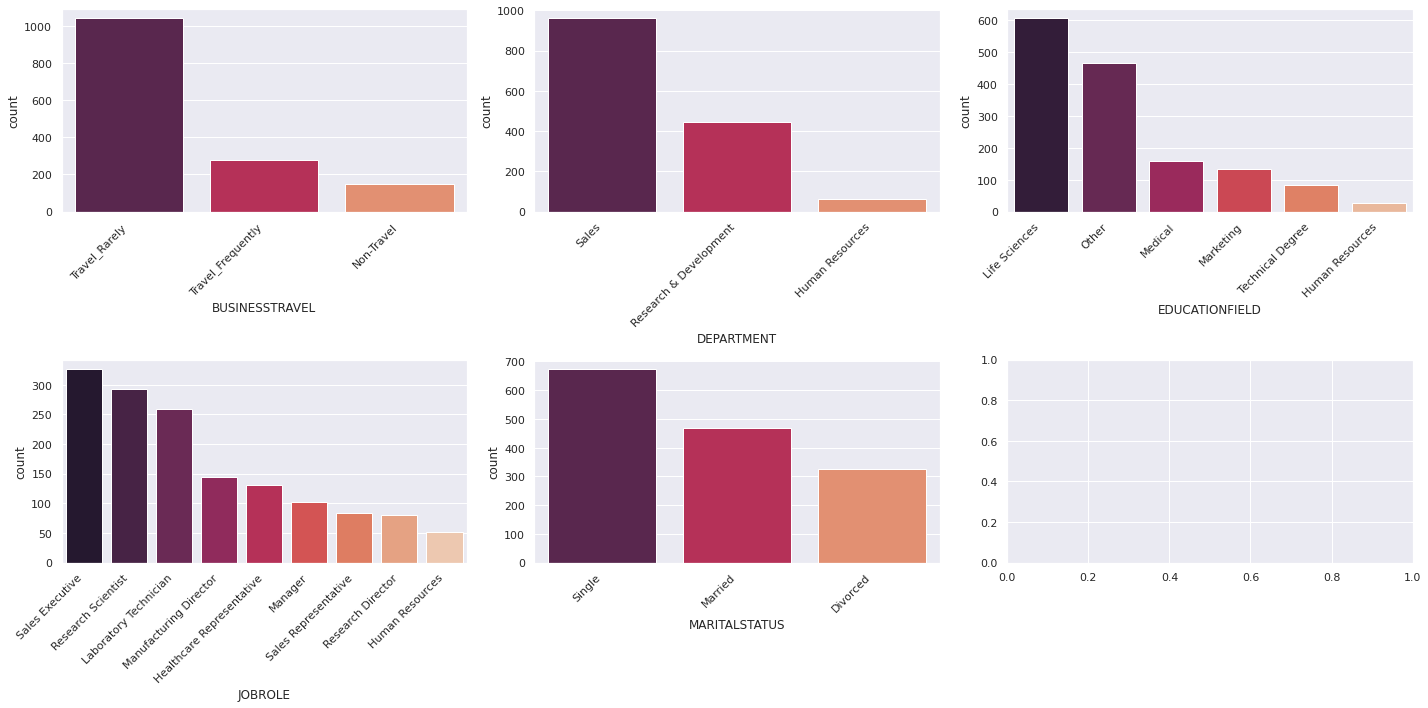

In [16]:
fig, ax = plt.subplots(2,3, figsize = (20,10))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sb.countplot(data = attrition_df, x = categorical_columns[i], ax = ax[i], palette="rocket", order = attrition_df[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = attrition_df[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (2, 3))
plt.tight_layout()

# 3. Statistical Analysis [Bivariate & Multivariate]

In [17]:
# Verifying the number of columns

print('Number of numeric columns: ', len(numeric_columns))
print('Number of categorical columns: ', len(categorical_columns))

Number of numeric columns:  30
Number of categorical columns:  5


In [18]:
# Summary Statistics for Categorical
attrition_df[categorical_columns].describe()

,BUSINESSTRAVEL,DEPARTMENT,EDUCATIONFIELD,JOBROLE,MARITALSTATUS
count,1470,1470,1470,1470,1470
unique,3,3,6,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Sales Executive,Married
freq,1043,961,606,326,673


In [19]:
# Summary Statistics for Numeric
attrition_df[numeric_columns].describe()

,AGE,DAILYRATE,DISTANCEFROMHOME,EDUCATION,EMPLOYEENUMBER,ENVIRONMENTSATISFACTION,HOURLYRATE,JOBINVOLVEMENT,JOBLEVEL,JOBSATISFACTION,...,YEARSSINCELASTPROMOTION,YEARSWITHCURRMANAGER,ATTRITION_ONE_HOT_Y_1,GENDER_ONE_HOT_Y_1,OVERTIME_ONE_HOT_Y_1,BIZ_TRAVEL_[LABELLED],DEPARTMENT_[LABELLED],EDUCATIONFIELD_[LABELLED],JOBROLE_[LABELLED],MARITALSTATUS_[LABELLED]
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.187755,4.123129,0.161224,0.600000,0.282993,1.607483,1.260544,2.247619,4.458503,1.097279
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,3.222430,3.568136,0.367863,0.490065,0.450606,0.665455,0.527792,1.331369,2.461821,0.730121
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,1.000000,3.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,5.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,7.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,7.000000,2.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,15.000000,17.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,8.000000,2.000000


---

# 4. Basic Exploratory Data Analysis

## 4.1 Box Plots, Histograms, and Violin Plots for Numeric Variables

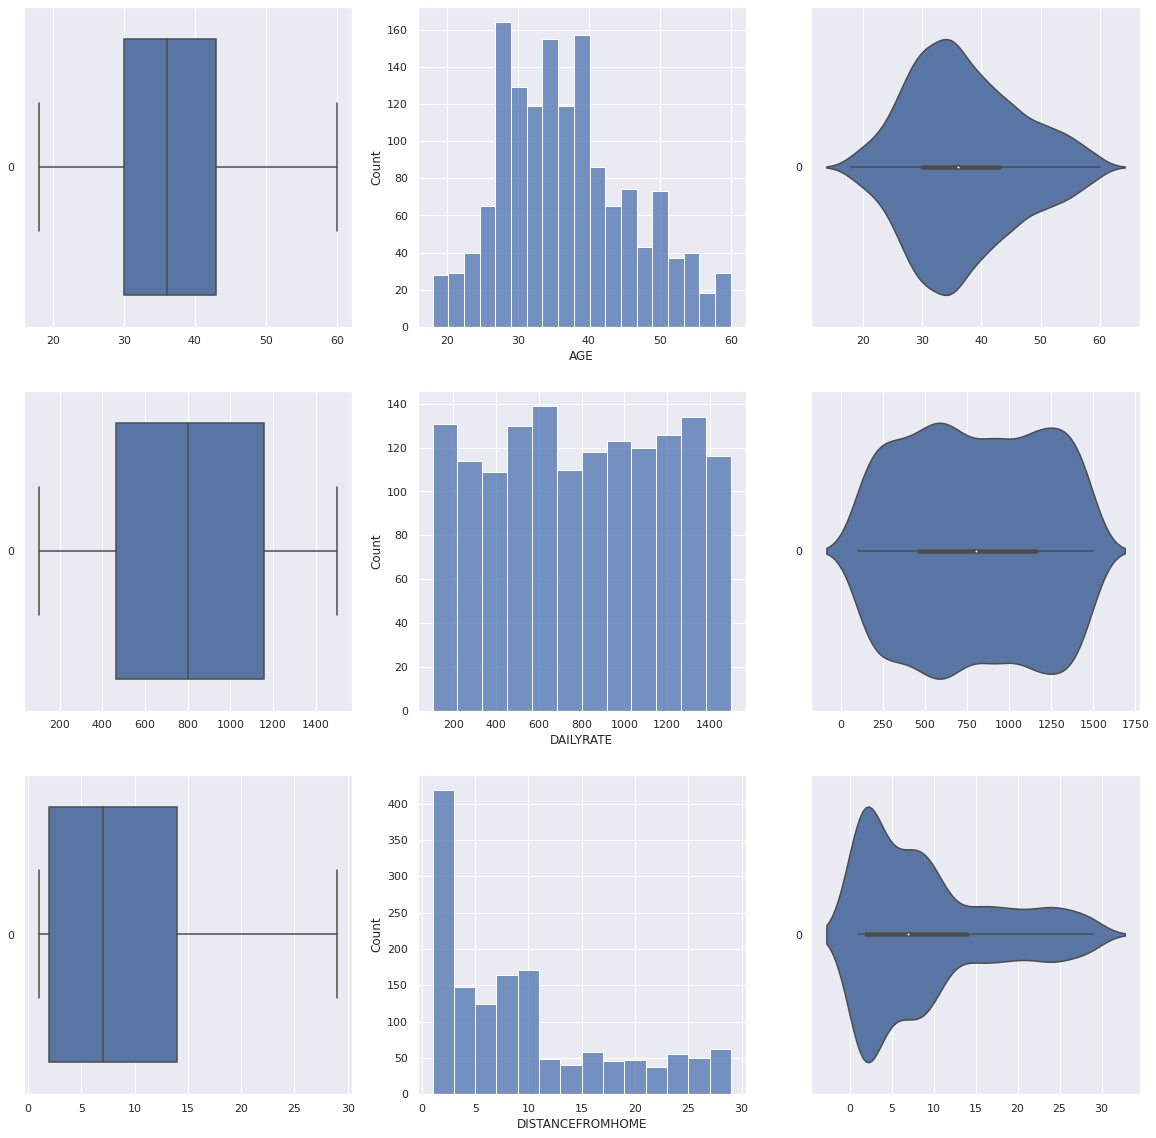

In [20]:
numeric_data = pd.DataFrame(attrition_df[numeric_columns])

f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[:3]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1


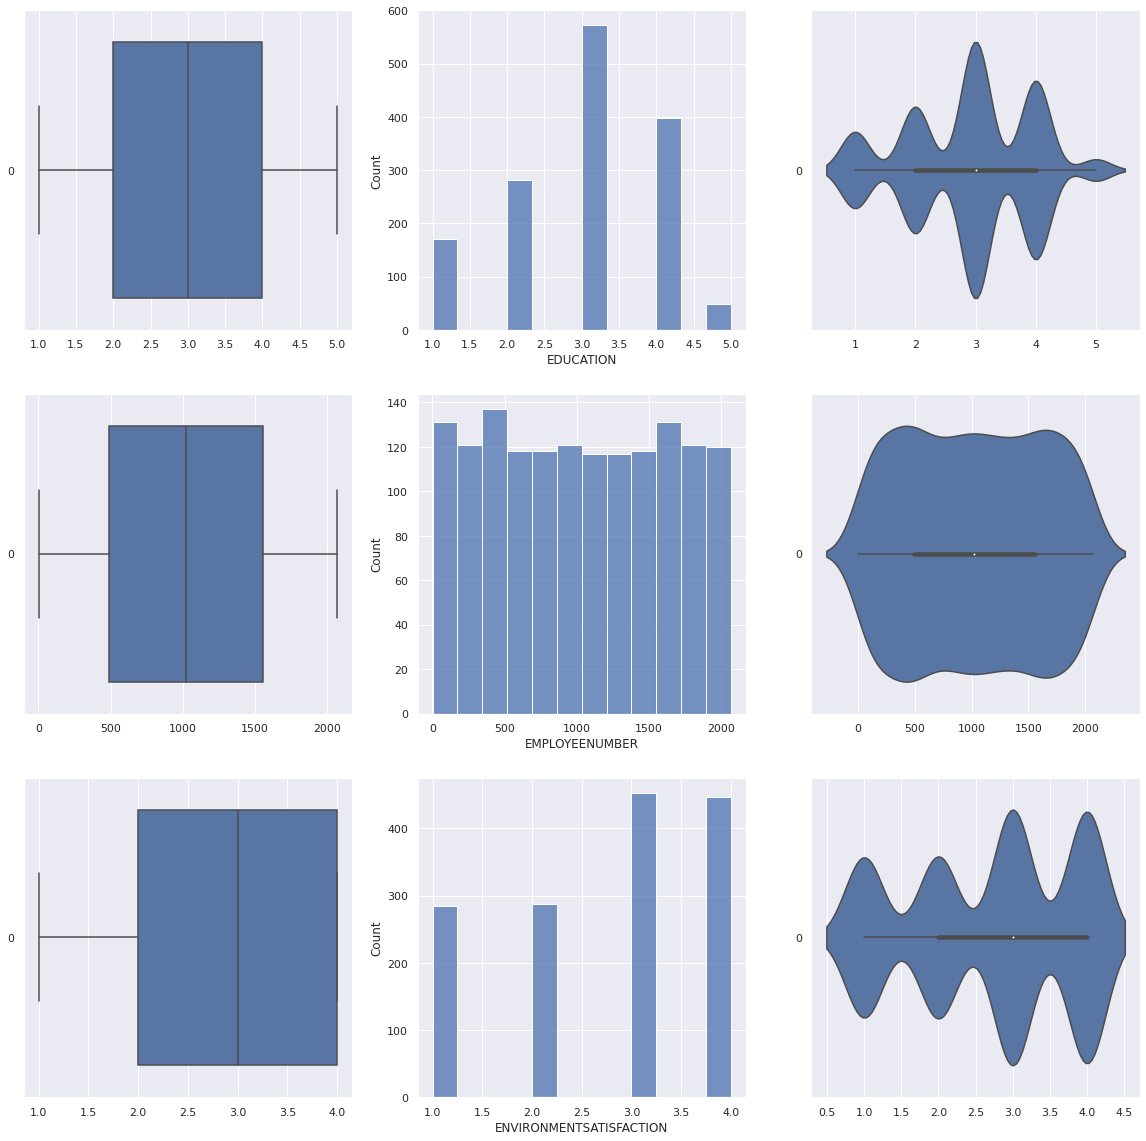

In [21]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[3:6]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

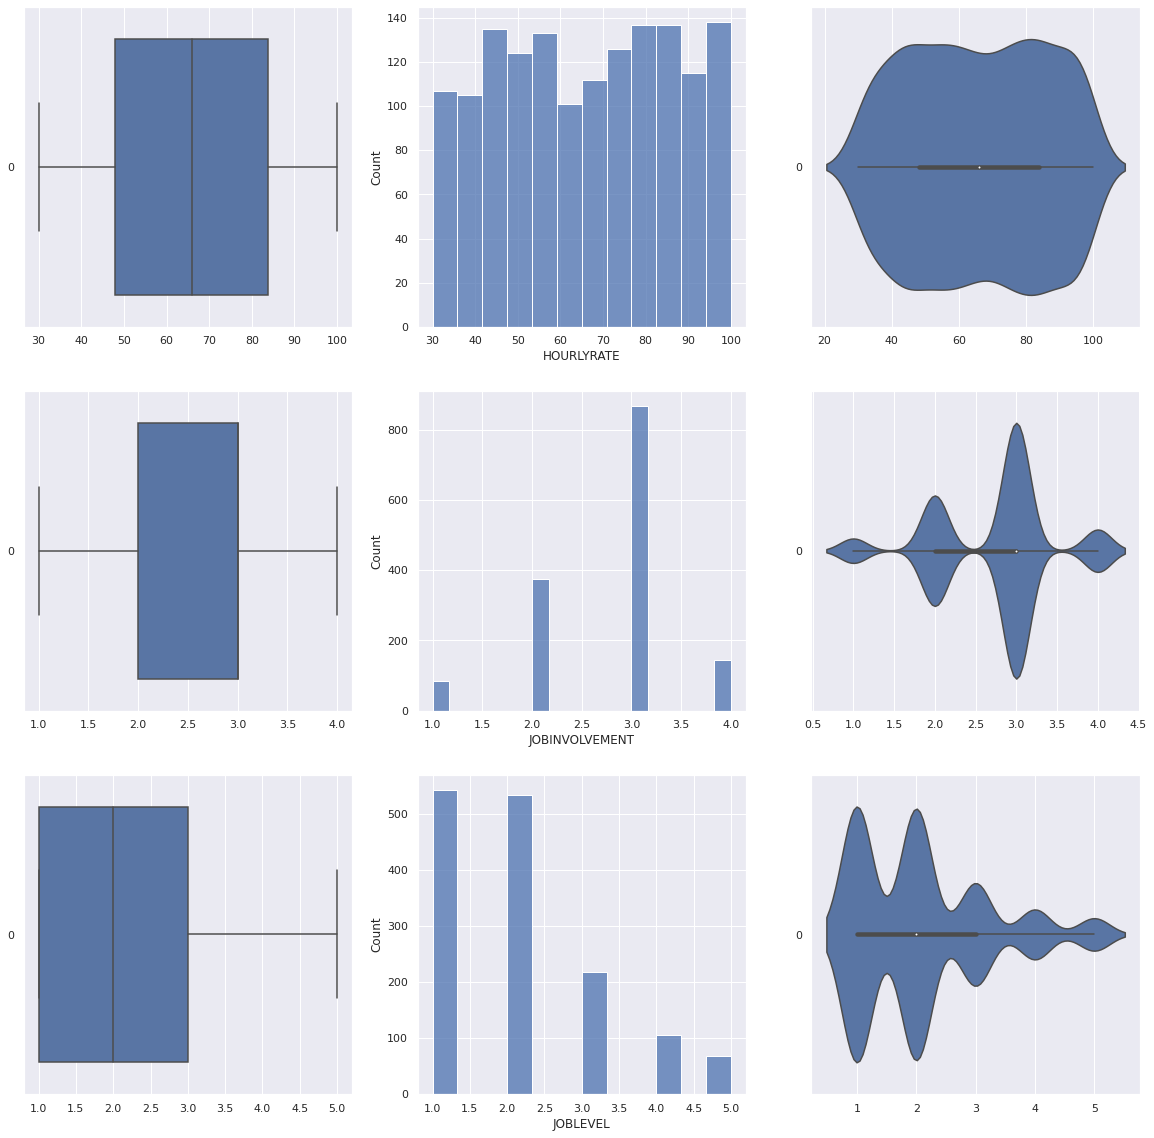

In [22]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[6:9]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

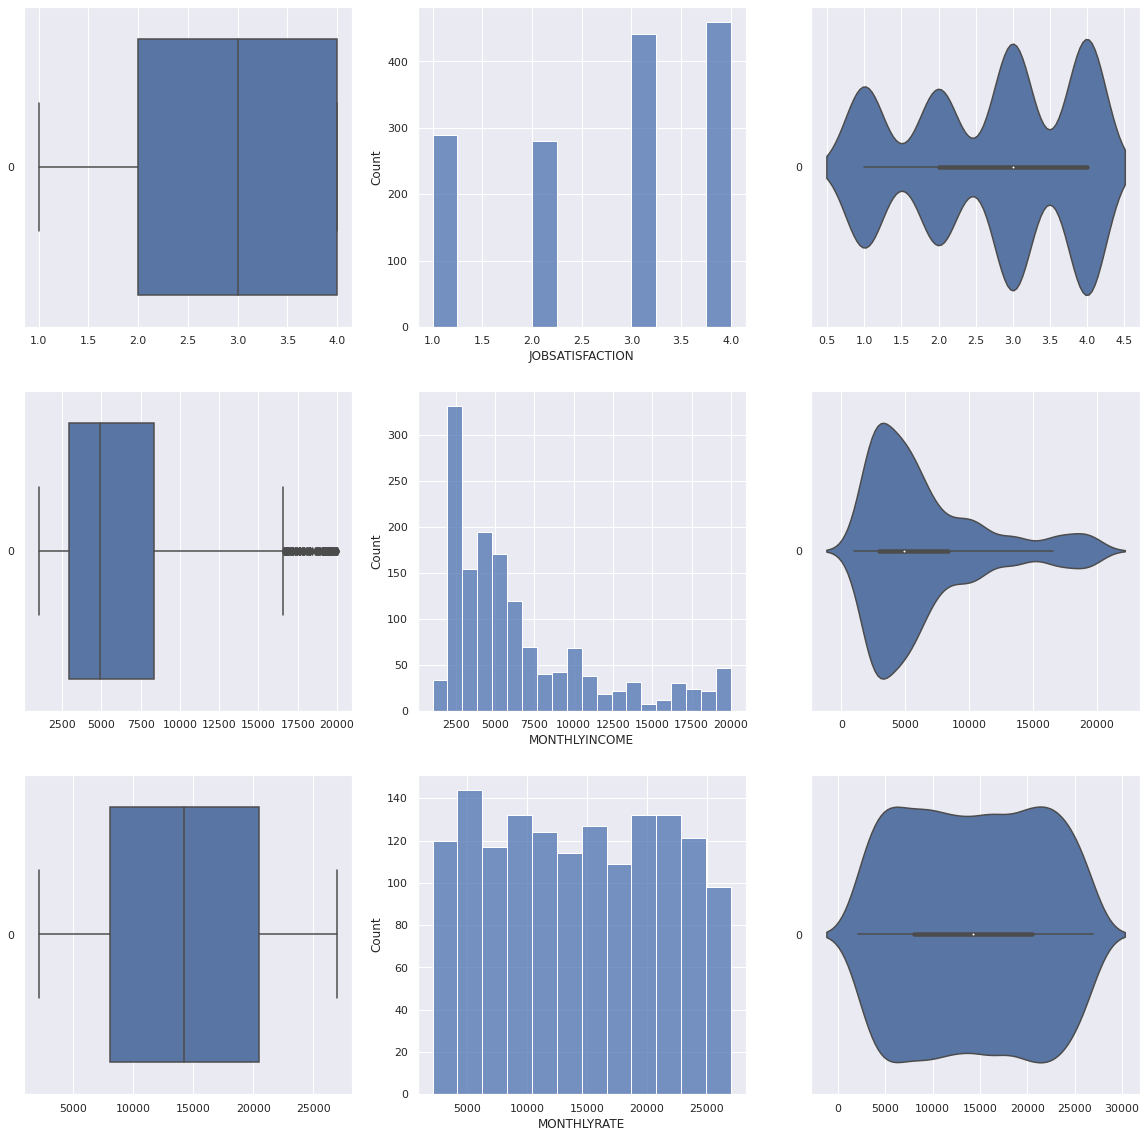

In [23]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[9:12]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

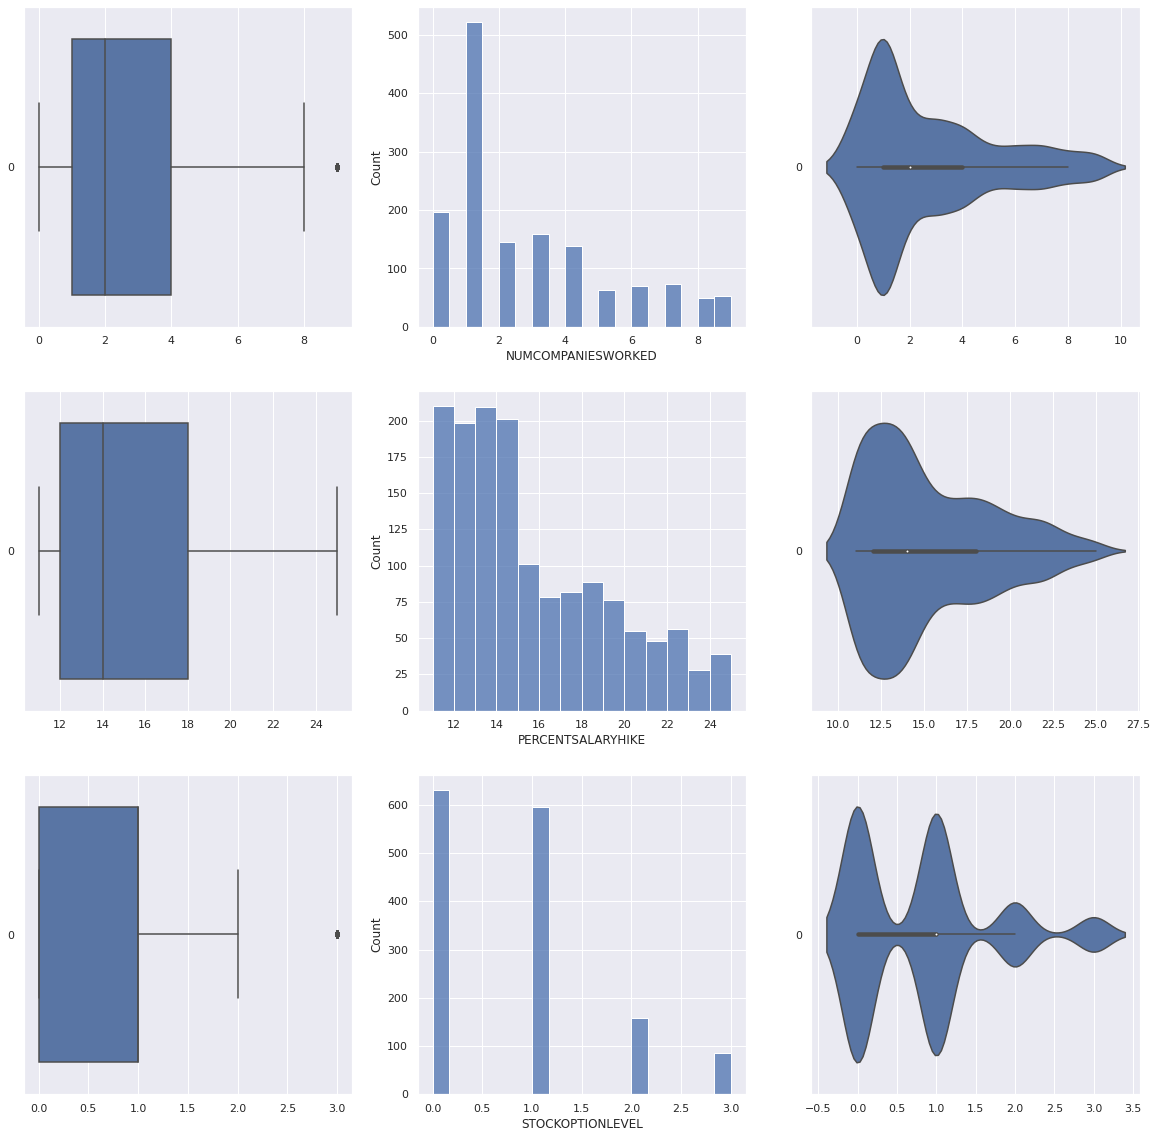

In [24]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[12:15]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

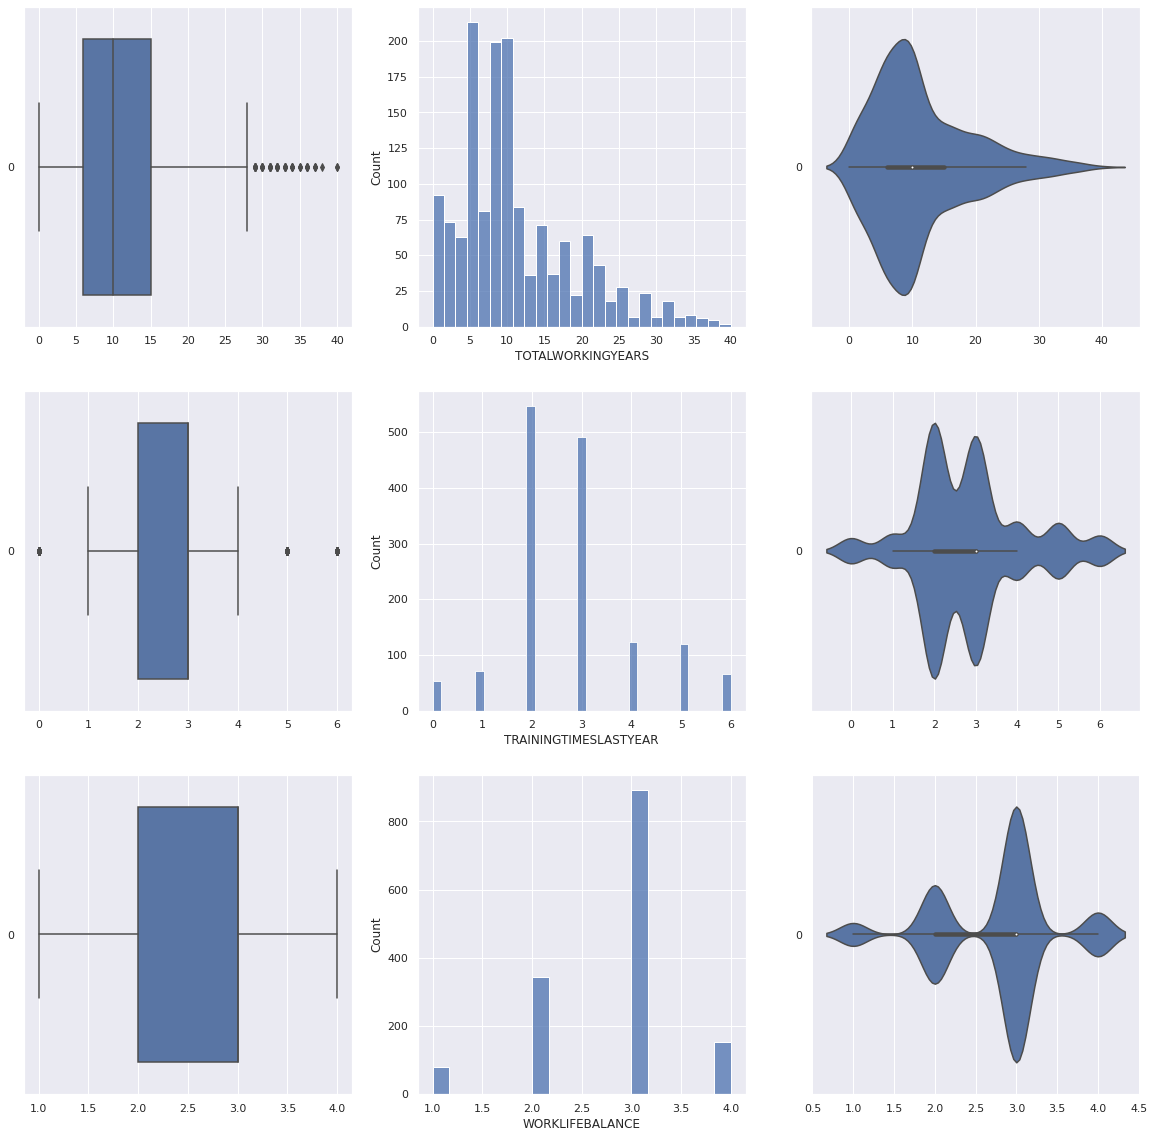

In [25]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[15:18]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

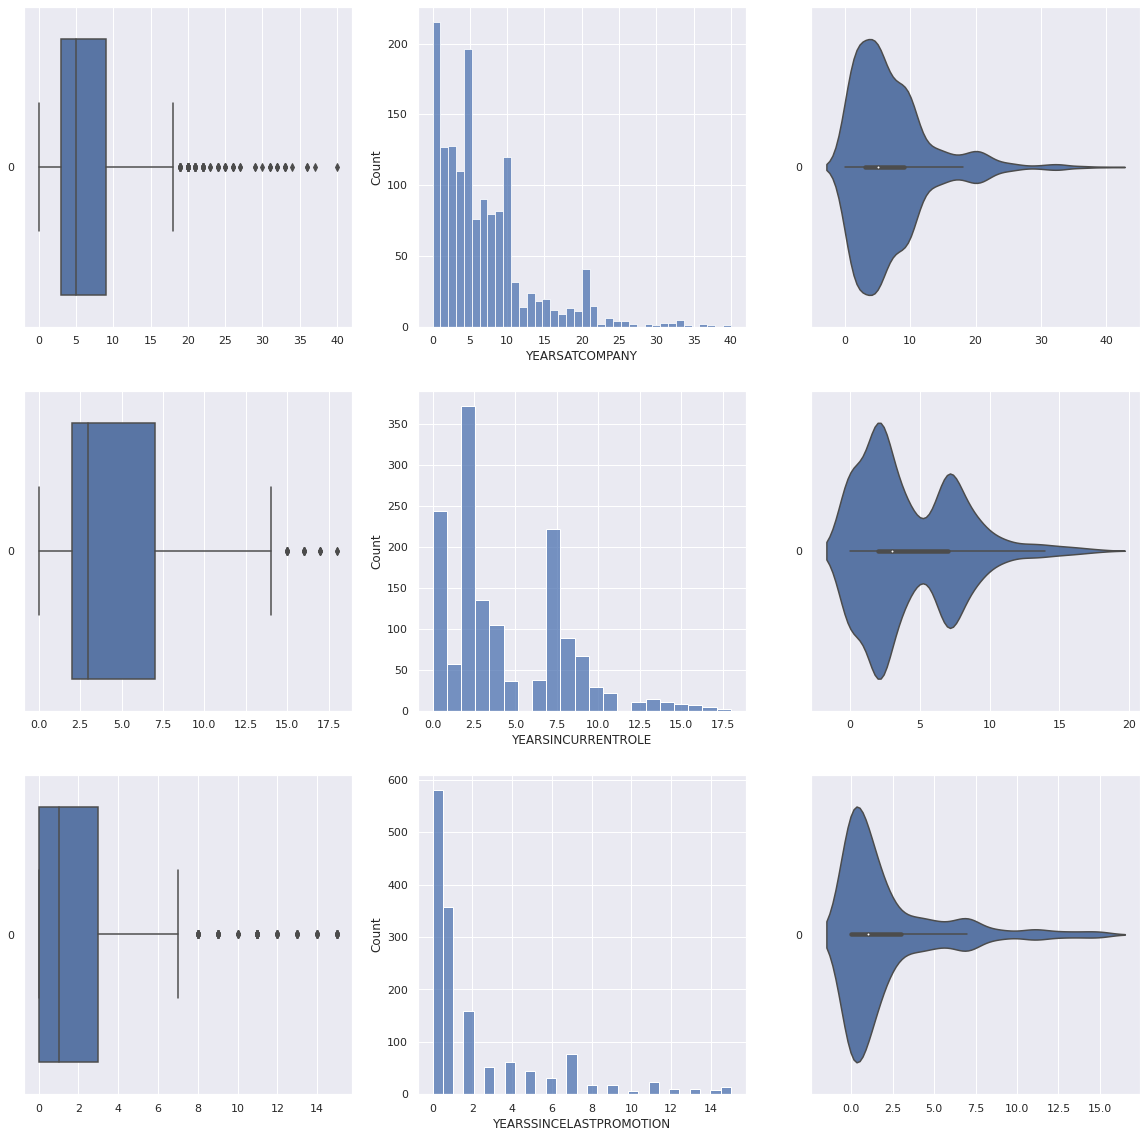

In [26]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[18:21]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

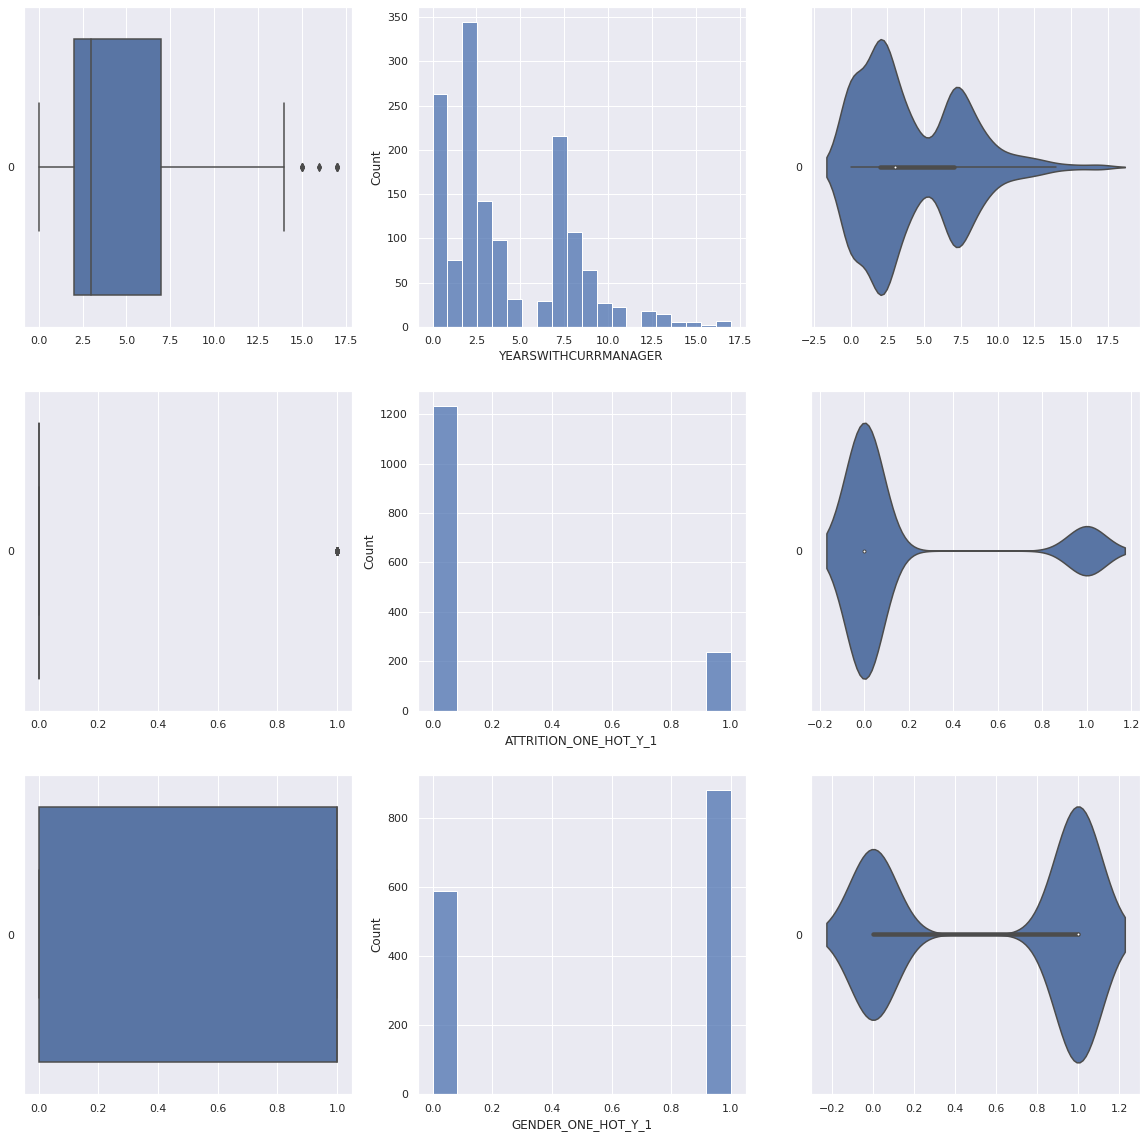

In [27]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[21:24]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

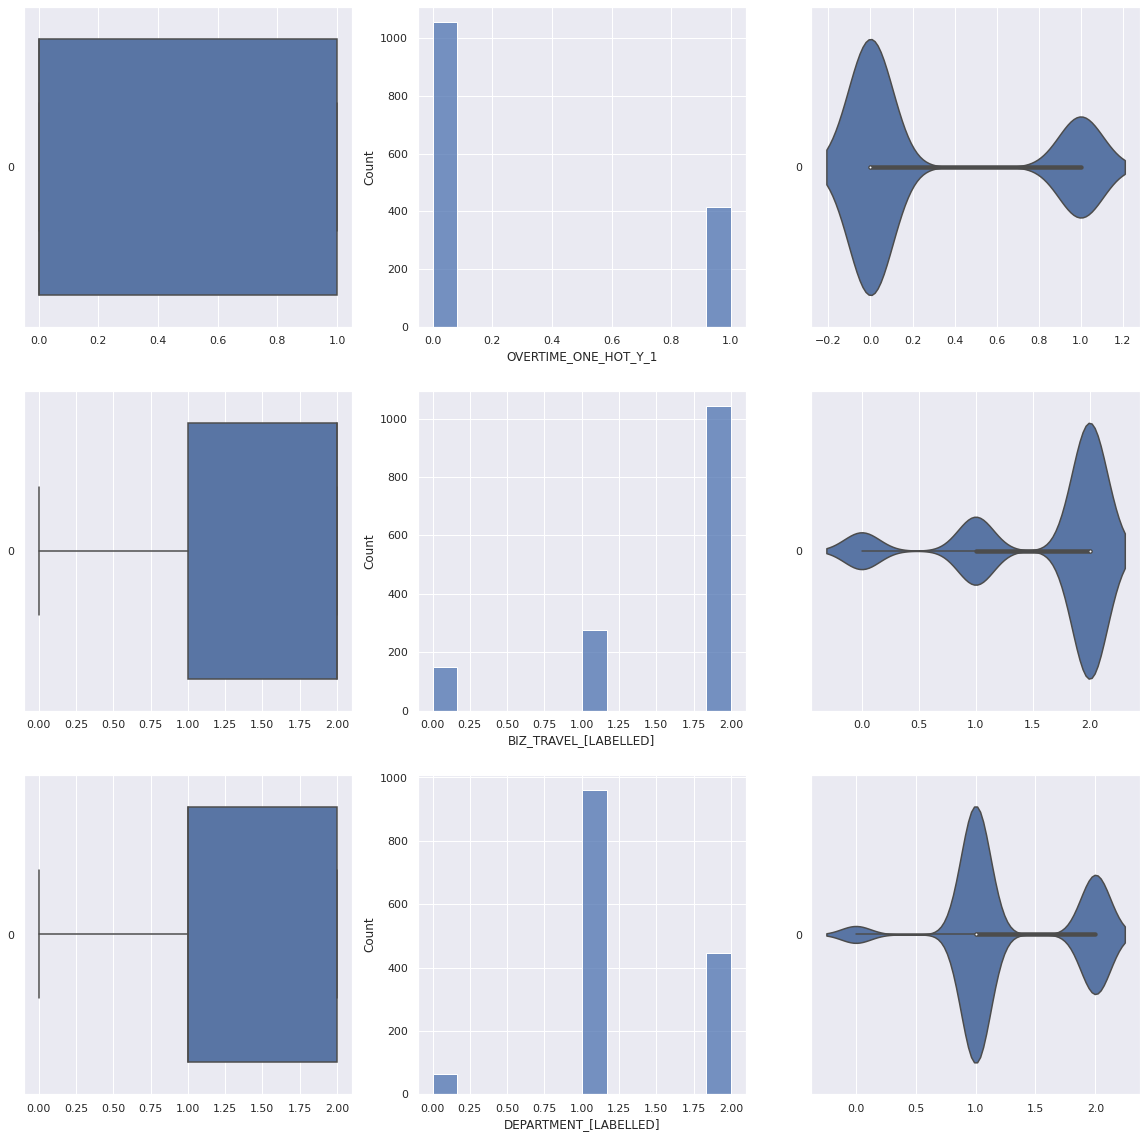

In [28]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[24:27]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

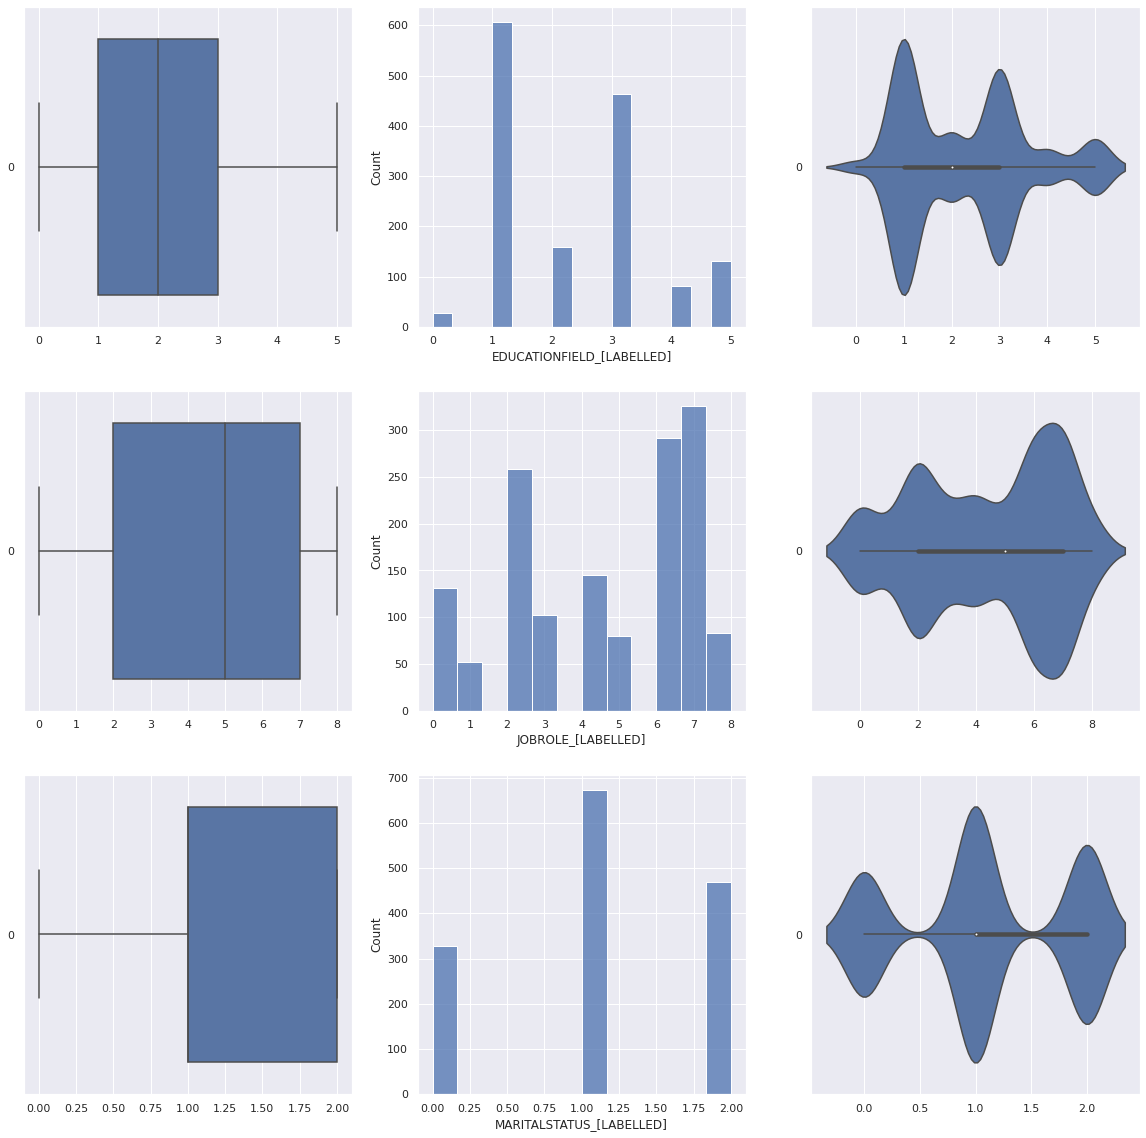

In [29]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

count = 0
for var in numeric_columns[27:30]:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

## 4.2 Visualisation of Dataset [Determine which ML Model to use]

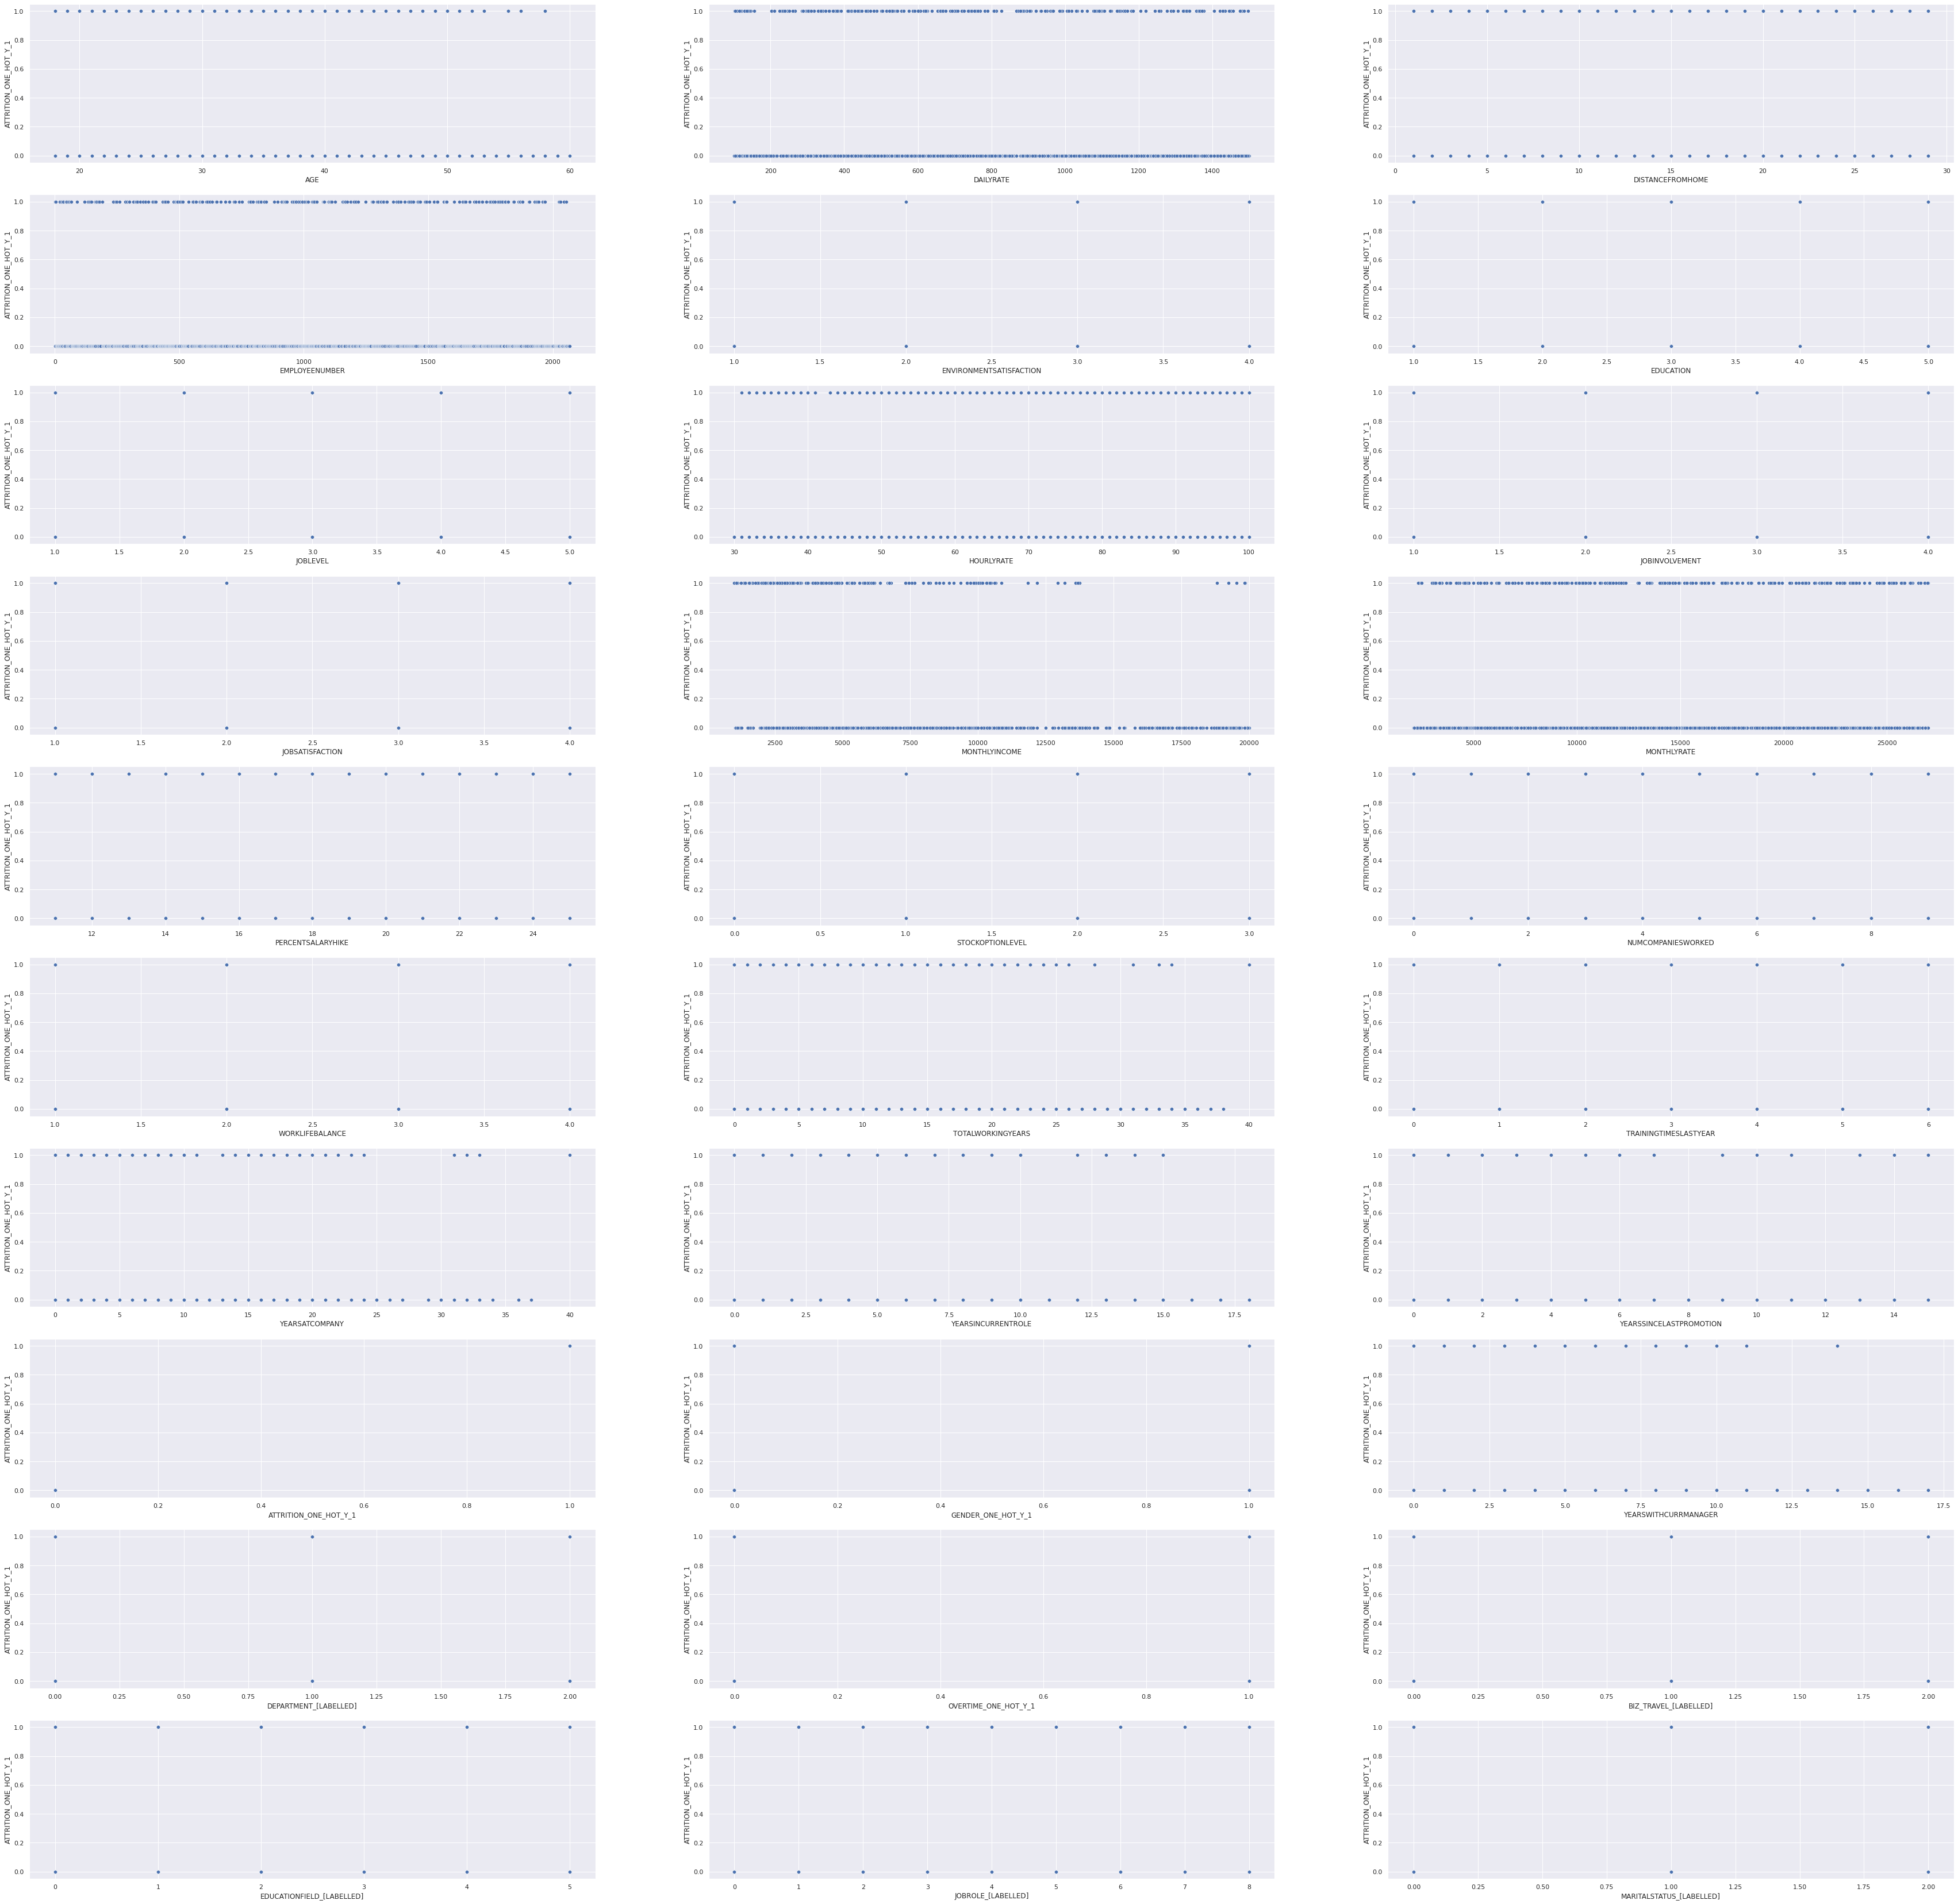

In [30]:
import seaborn as sb

f, axes = plt.subplots(10, 3, figsize=(60, 60))

# Plotting a Scatterplot to see the shape of our Datasets
varList = []
for i in numeric_data.columns:
    varList.append(i)
horiCounter = 0
vertiCounter = 0
for j in range(1, (len(varList) + 1)):
    sb.scatterplot(x = numeric_data[varList[j-1]], y = attrition_df['ATTRITION_ONE_HOT_Y_1'], ax = axes [vertiCounter,horiCounter])
    if (j % 3 == 0):
        # After every 3 plots, Verti increments by 1
        vertiCounter += 1
    elif horiCounter == 2:
        horiCounter = 0
    else:
        # After every plot, Hori Increments by one
        horiCounter += 1



# 5. Removal of Outliers [Post-EDA]

After analysing the data, we found that there are a few variables that have many outliers. They mainly consist of variables that are affected by the employees who stay in the company for many years. Such outliers have the potential of causing inaccurate analysis and hence have to be removed.

VARIABLES GOING TO DROP:

    THOSE RELATED TO THE NUMBER OF YEARS WORKED:    
        TOTALWORKINGYEARS
        TRAININGTIMESLASTYEAR
        YEARCURRENTROLE
        YEARSSINCELASTPROMOTION
        YEARSWITHCURRENTMANAGER

    THOSE RELATED TO INCOME:
        MONTHLYINCOME

In [31]:
targetData = attrition_df[["MONTHLYINCOME","TOTALWORKINGYEARS","TOTALWORKINGYEARS", "TRAININGTIMESLASTYEAR", "YEARSINCURRENTROLE", "YEARSSINCELASTPROMOTION", "YEARSWITHCURRMANAGER"]].copy()

# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

MONTHLYINCOME              114
TOTALWORKINGYEARS           63
TOTALWORKINGYEARS           63
TRAININGTIMESLASTYEAR      238
YEARSINCURRENTROLE          21
YEARSSINCELASTPROMOTION    107
YEARSWITHCURRMANAGER        14
dtype: int64

In [32]:
rule

,MONTHLYINCOME,TOTALWORKINGYEARS,TOTALWORKINGYEARS,TRAININGTIMESLASTYEAR,YEARSINCURRENTROLE,YEARSSINCELASTPROMOTION,YEARSWITHCURRMANAGER
0,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False
1466,False,False,False,True,False,False,False
1467,False,False,False,True,False,False,False
1468,False,False,False,False,False,False,False


In [33]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0        True
1       False
2       False
3       False
4       False
        ...  
1465    False
1466     True
1467     True
1468    False
1469    False
Length: 1470, dtype: bool

In [34]:
outliers.value_counts()

False    1041
True      429
dtype: int64

In [35]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([   0,   10,   15,   16,   18,   20,   23,   25,   26,   28,
            ...
            1436, 1437, 1443, 1444, 1447, 1448, 1458, 1462, 1466, 1467],
           dtype='int64', length=429)

In [36]:
# Remove the outliers based on the row indices obtained above

attrition_df.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
attrition_df

,AGE,BUSINESSTRAVEL,DAILYRATE,DEPARTMENT,DISTANCEFROMHOME,EDUCATION,EDUCATIONFIELD,EMPLOYEENUMBER,ENVIRONMENTSATISFACTION,HOURLYRATE,...,YEARSSINCELASTPROMOTION,YEARSWITHCURRMANAGER,ATTRITION_ONE_HOT_Y_1,GENDER_ONE_HOT_Y_1,OVERTIME_ONE_HOT_Y_1,BIZ_TRAVEL_[LABELLED],DEPARTMENT_[LABELLED],EDUCATIONFIELD_[LABELLED],JOBROLE_[LABELLED],MARITALSTATUS_[LABELLED]
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,61,...,1,7,0.0,1.0,0.0,1,1,1,6,1
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,92,...,0,0,1.0,1.0,1.0,2,1,4,2,2
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,56,...,3,0,0.0,0.0,1.0,1,1,1,6,1
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,40,...,2,2,0.0,1.0,0.0,2,1,3,2,1
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,79,...,3,6,0.0,1.0,0.0,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,Non-Travel,325,Research & Development,5,3,Medical,2057,2,74,...,1,7,0.0,1.0,0.0,0,1,3,4,2
1464,26,Travel_Rarely,1167,Sales,5,3,Other,2060,4,30,...,0,0,0.0,0.0,0.0,2,2,4,8,2
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,41,...,0,3,0.0,1.0,0.0,1,1,3,2,1
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,63,...,0,8,0.0,1.0,0.0,1,2,3,7,1


In [37]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        1041 non-null   int64  
 1   BUSINESSTRAVEL             1041 non-null   object 
 2   DAILYRATE                  1041 non-null   int64  
 3   DEPARTMENT                 1041 non-null   object 
 4   DISTANCEFROMHOME           1041 non-null   int64  
 5   EDUCATION                  1041 non-null   int64  
 6   EDUCATIONFIELD             1041 non-null   object 
 7   EMPLOYEENUMBER             1041 non-null   int64  
 8   ENVIRONMENTSATISFACTION    1041 non-null   int64  
 9   HOURLYRATE                 1041 non-null   int64  
 10  JOBINVOLVEMENT             1041 non-null   int64  
 11  JOBLEVEL                   1041 non-null   int64  
 12  JOBROLE                    1041 non-null   object 
 13  JOBSATISFACTION            1041 non-null   int64

#### To ensure that the outliers have been removed.

In [38]:
print('Number of numeric columns: ', len(numeric_columns))


Number of numeric columns:  30


In [39]:
numeric_data = pd.DataFrame(attrition_df[numeric_columns])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 1 to 1469
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        1041 non-null   int64  
 1   DAILYRATE                  1041 non-null   int64  
 2   DISTANCEFROMHOME           1041 non-null   int64  
 3   EDUCATION                  1041 non-null   int64  
 4   EMPLOYEENUMBER             1041 non-null   int64  
 5   ENVIRONMENTSATISFACTION    1041 non-null   int64  
 6   HOURLYRATE                 1041 non-null   int64  
 7   JOBINVOLVEMENT             1041 non-null   int64  
 8   JOBLEVEL                   1041 non-null   int64  
 9   JOBSATISFACTION            1041 non-null   int64  
 10  MONTHLYINCOME              1041 non-null   int64  
 11  MONTHLYRATE                1041 non-null   int64  
 12  NUMCOMPANIESWORKED         1041 non-null   int64  
 13  PERCENTSALARYHIKE          1041 non-null   int64

In [40]:
log_num_data = numeric_data.copy() #created for logistic regression later
log_num_data.drop(['ATTRITION_ONE_HOT_Y_1'], axis = 1, inplace = True)

#### Checking EDA after outliers were dropped

In [41]:
numeric_data

,AGE,DAILYRATE,DISTANCEFROMHOME,EDUCATION,EMPLOYEENUMBER,ENVIRONMENTSATISFACTION,HOURLYRATE,JOBINVOLVEMENT,JOBLEVEL,JOBSATISFACTION,...,YEARSSINCELASTPROMOTION,YEARSWITHCURRMANAGER,ATTRITION_ONE_HOT_Y_1,GENDER_ONE_HOT_Y_1,OVERTIME_ONE_HOT_Y_1,BIZ_TRAVEL_[LABELLED],DEPARTMENT_[LABELLED],EDUCATIONFIELD_[LABELLED],JOBROLE_[LABELLED],MARITALSTATUS_[LABELLED]
1,49,279,8,1,2,3,61,2,2,2,...,1,7,0.0,1.0,0.0,1,1,1,6,1
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,1.0,1.0,1.0,2,1,4,2,2
3,33,1392,3,4,5,4,56,3,1,3,...,3,0,0.0,0.0,1.0,1,1,1,6,1
4,27,591,2,1,7,1,40,3,1,2,...,2,2,0.0,1.0,0.0,2,1,3,2,1
5,32,1005,2,2,8,4,79,3,1,4,...,3,6,0.0,1.0,0.0,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,325,5,3,2057,2,74,3,2,1,...,1,7,0.0,1.0,0.0,0,1,3,4,2
1464,26,1167,5,3,2060,4,30,2,1,3,...,0,0,0.0,0.0,0.0,2,2,4,8,2
1465,36,884,23,2,2061,3,41,4,2,4,...,0,3,0.0,1.0,0.0,1,1,3,2,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,0,8,0.0,1.0,0.0,1,2,3,7,1


In [42]:
numeric_columns

['AGE',
 'DAILYRATE',
 'DISTANCEFROMHOME',
 'EDUCATION',
 'EMPLOYEENUMBER',
 'ENVIRONMENTSATISFACTION',
 'HOURLYRATE',
 'JOBINVOLVEMENT',
 'JOBLEVEL',
 'JOBSATISFACTION',
 'MONTHLYINCOME',
 'MONTHLYRATE',
 'NUMCOMPANIESWORKED',
 'PERCENTSALARYHIKE',
 'STOCKOPTIONLEVEL',
 'TOTALWORKINGYEARS',
 'TRAININGTIMESLASTYEAR',
 'WORKLIFEBALANCE',
 'YEARSATCOMPANY',
 'YEARSINCURRENTROLE',
 'YEARSSINCELASTPROMOTION',
 'YEARSWITHCURRMANAGER',
 'ATTRITION_ONE_HOT_Y_1',
 'GENDER_ONE_HOT_Y_1',
 'OVERTIME_ONE_HOT_Y_1',
 'BIZ_TRAVEL_[LABELLED]',
 'DEPARTMENT_[LABELLED]',
 'EDUCATIONFIELD_[LABELLED]',
 'JOBROLE_[LABELLED]',
 'MARITALSTATUS_[LABELLED]']

In [43]:
varList2 = ['TOTALWORKINGYEARS', "TRAININGTIMESLASTYEAR", "YEARSINCURRENTROLE", "YEARSSINCELASTPROMOTION", "YEARSWITHCURRMANAGER"]
varList2

['TOTALWORKINGYEARS',
 'TRAININGTIMESLASTYEAR',
 'YEARSINCURRENTROLE',
 'YEARSSINCELASTPROMOTION',
 'YEARSWITHCURRMANAGER']

In [44]:
numeric_data['YEARSWITHCURRMANAGER']

1       7
2       0
3       0
4       2
5       6
       ..
1463    7
1464    0
1465    3
1468    8
1469    2
Name: YEARSWITHCURRMANAGER, Length: 1041, dtype: int64

---

# 6. Machine Learning

## 6.1 Logistics Regression Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [46]:
X = log_num_data
y = attrition_df['ATTRITION_ONE_HOT_Y_1'].values.ravel()

# Split train and test set into 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)
sc = StandardScaler()
sc.fit(X_train)
logmodel = LogisticRegression()
logmodel.fit(sc.transform(X_train), y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.10f}'.format(logmodel.score(X_train,y_train)))
print('Test Model accruracy scores: {:.10f}'.format(logmodel.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.7860576923
Test Model accruracy scores: 0.8421052632
--------------------------------------------------------------------------
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


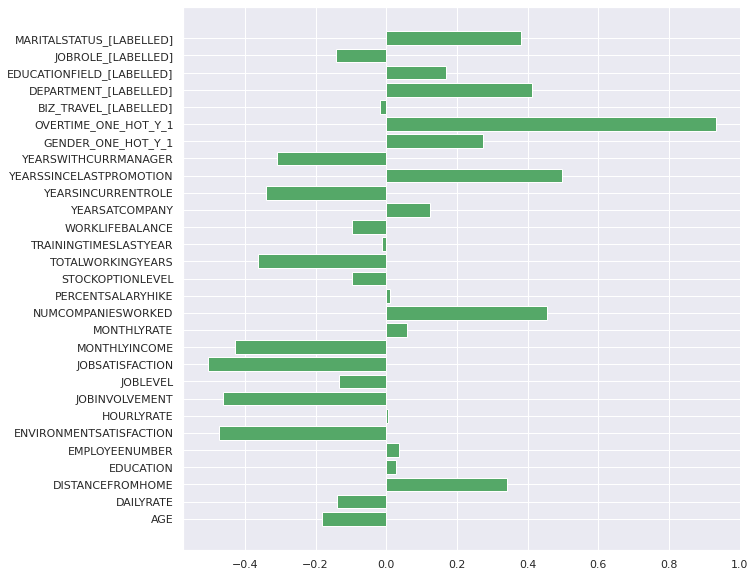

In [47]:
# Obtain variable importance
importance = logmodel.coef_.flatten()
plt.rcParams['figure.figsize'] = (10, 10)
plt.barh(log_num_data.columns, importance, color = 'g')
plt.show()

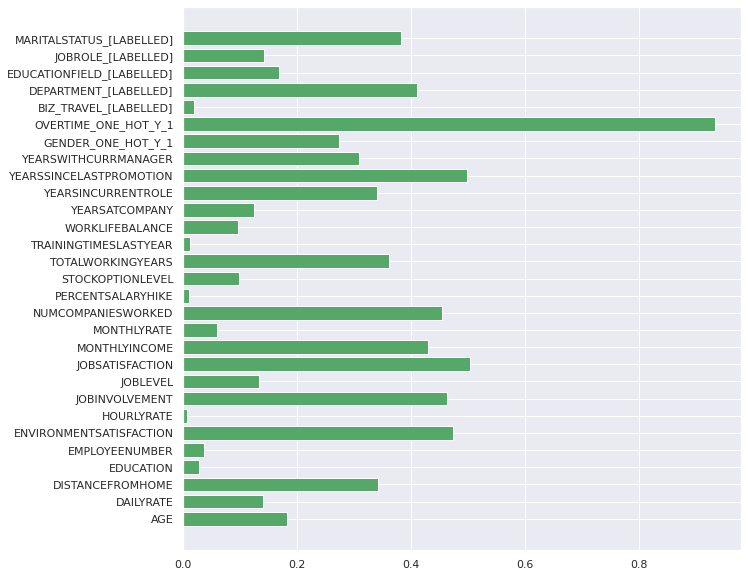

In [48]:
# This is for easier visualisation (absolute values of importance instead of having positive and negative values)
importance = logmodel.coef_.flatten()
plt.rcParams['figure.figsize'] = (10, 10)
plt.barh(log_num_data.columns, abs(importance), color = 'g')
plt.show()

From the logistics regression, we are able to deduce the features importance. We shortlisted 8 most important features as listed below:

1. OVERTIME_ONE_HOT_Y_1  
2. JOBSATISFACTION  
3. YEARSSINCELASTPROMOTION  
4. ENVIRONMENTSATISFACTION  
5. NUMCOMPANIESWORKED  
6. JOBINVOLVEMENT  
7. MONTHLYINCOME  
8. DEPARTMENT_[LABELLED]

## 6.2 Decision Tree

In [49]:
attrition_df_copy = attrition_df.copy()

In [50]:
# Remove Unencoded Variables
attrition_df_copy.drop(["BUSINESSTRAVEL","DEPARTMENT", "EDUCATIONFIELD", "JOBROLE", "MARITALSTATUS"], axis = 1, inplace = True)

attrition_df_copy

,AGE,DAILYRATE,DISTANCEFROMHOME,EDUCATION,EMPLOYEENUMBER,ENVIRONMENTSATISFACTION,HOURLYRATE,JOBINVOLVEMENT,JOBLEVEL,JOBSATISFACTION,...,YEARSSINCELASTPROMOTION,YEARSWITHCURRMANAGER,ATTRITION_ONE_HOT_Y_1,GENDER_ONE_HOT_Y_1,OVERTIME_ONE_HOT_Y_1,BIZ_TRAVEL_[LABELLED],DEPARTMENT_[LABELLED],EDUCATIONFIELD_[LABELLED],JOBROLE_[LABELLED],MARITALSTATUS_[LABELLED]
1,49,279,8,1,2,3,61,2,2,2,...,1,7,0.0,1.0,0.0,1,1,1,6,1
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,1.0,1.0,1.0,2,1,4,2,2
3,33,1392,3,4,5,4,56,3,1,3,...,3,0,0.0,0.0,1.0,1,1,1,6,1
4,27,591,2,1,7,1,40,3,1,2,...,2,2,0.0,1.0,0.0,2,1,3,2,1
5,32,1005,2,2,8,4,79,3,1,4,...,3,6,0.0,1.0,0.0,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,325,5,3,2057,2,74,3,2,1,...,1,7,0.0,1.0,0.0,0,1,3,4,2
1464,26,1167,5,3,2060,4,30,2,1,3,...,0,0,0.0,0.0,0.0,2,2,4,8,2
1465,36,884,23,2,2061,3,41,4,2,4,...,0,3,0.0,1.0,0.0,1,1,3,2,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,0,8,0.0,1.0,0.0,1,2,3,7,1


### 6.2.1 Initial Trial of Decision Tree Classification

In [51]:
# Import essential models and functions from sklearn

from sklearn.model_selection import train_test_split


# Extract Response and Predictors ATTRITION_-_ONE_HOT_(Y_==_1)
y = pd.DataFrame(attrition_df_copy['ATTRITION_ONE_HOT_Y_1'])
X = pd.DataFrame(attrition_df_copy[['OVERTIME_ONE_HOT_Y_1', 'JOBSATISFACTION' ,'NUMCOMPANIESWORKED', 'YEARSSINCELASTPROMOTION','ENVIRONMENTSATISFACTION','NUMCOMPANIESWORKED','JOBINVOLVEMENT','MONTHLYINCOME','DEPARTMENT_[LABELLED]']])


# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (832, 9) (832, 1)
Test Set  : (209, 9) (209, 1)


#### Training Decision Tree with Depth = 2

<AxesSubplot:>

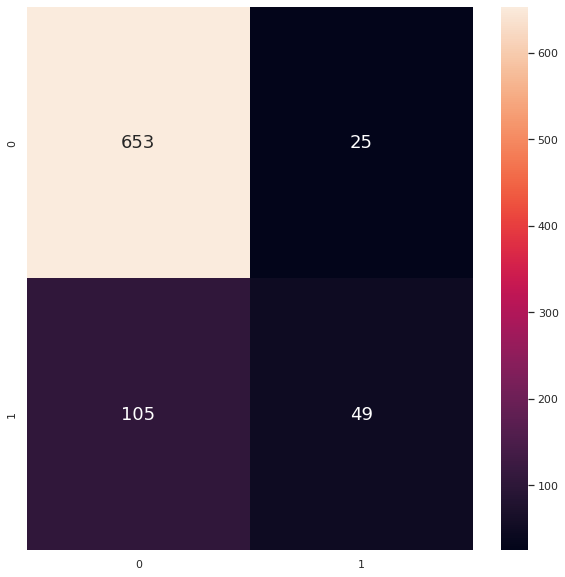

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Decision Tree with max depth = 2
tree_att_re_d2 = DecisionTreeClassifier(max_depth = 2)

# Fit the tree with max depth 2
tree_att_re_d2.fit(X_train, y_train)

# Predict the Response corresponding to Predictors
y_train_pred = tree_att_re_d2.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



In [53]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", tree_att_re_d2.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.84375

TPR Train :	 0.3181818181818182
TNR Train :	 0.9631268436578171

FPR Train :	 0.03687315634218289
FNR Train :	 0.6818181818181818


#### Training Decision Tree with Depth = 4

<AxesSubplot:>

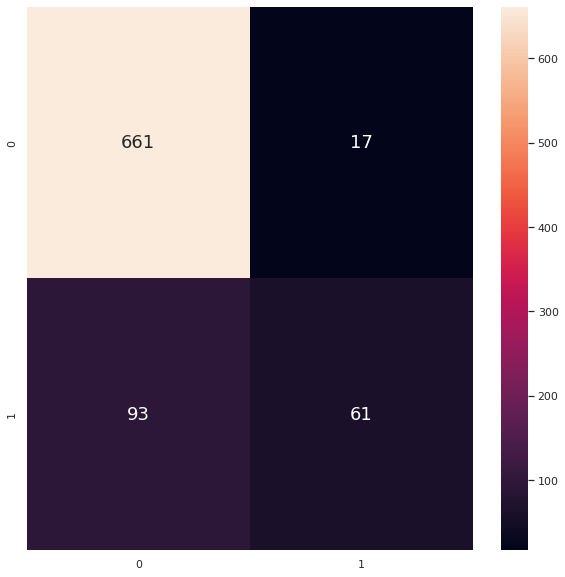

In [54]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Decision Tree with max depth = 4
tree_att_re_d4 = DecisionTreeClassifier(max_depth = 4)

# Fit the tree with max depth 2
tree_att_re_d4.fit(X_train, y_train)

# Predict the Response corresponding to Predictors
y_train_pred = tree_att_re_d4.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [55]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", tree_att_re_d4.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.8677884615384616

TPR Train :	 0.3961038961038961
TNR Train :	 0.9749262536873157

FPR Train :	 0.025073746312684365
FNR Train :	 0.6038961038961039


#### Predicting Response with Predictors of test data with depth = 2

<AxesSubplot:>

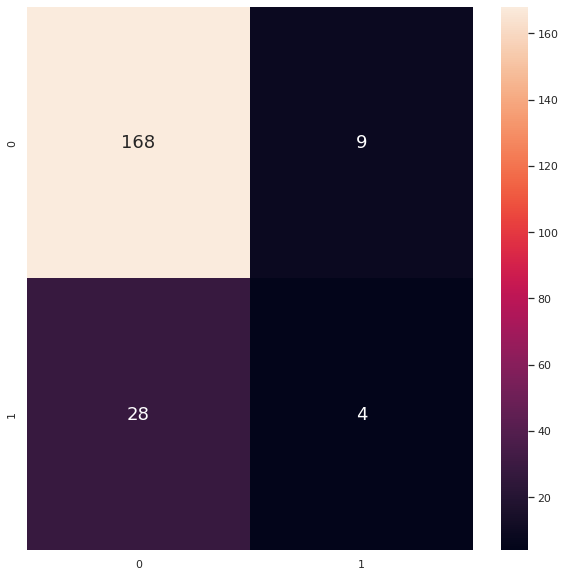

In [56]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = tree_att_re_d2.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [57]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_att_re_d2.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.8229665071770335

TPR Test :	 0.125
TNR Test :	 0.9491525423728814

FPR Test :	 0.05084745762711865
FNR Test :	 0.875


#### Predicting Response with Predictors of test data with depth = 4

<AxesSubplot:>

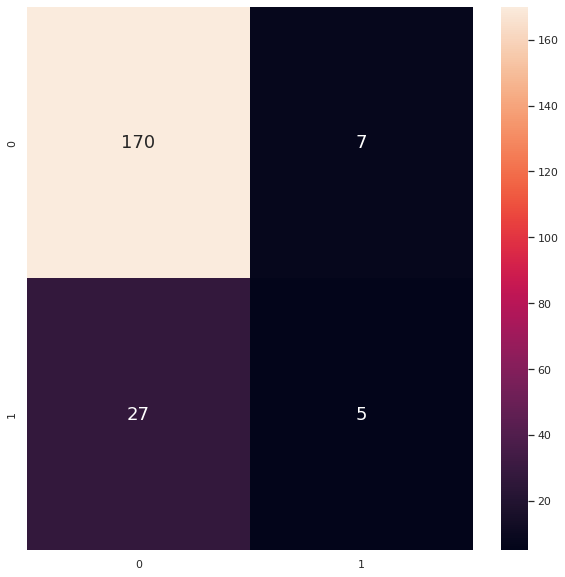

In [58]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = tree_att_re_d4.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [59]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_att_re_d4.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.8373205741626795

TPR Test :	 0.15625
TNR Test :	 0.96045197740113

FPR Test :	 0.03954802259887006
FNR Test :	 0.84375


Though the classification accuracy of the models is decent with an average of at least 80%, it could have been due to the fact that there are too many data points with ATTRITION_ONE_HOT_Y_1 == 0 compared to ATTRITION_ONE_HOT_Y_1 == 1.  The class imbalance is a cause for concern as it can lead to the decision tree looking accurate though it may not be the case.

Hence, we have to perform a resampling of the data and perform decision tree classification again.

### 6.2.2 Final trial of Decision Tree Classification (with resampling of data)

In [60]:
attrition_df_copy['ATTRITION_ONE_HOT_Y_1'].value_counts()

0.0    855
1.0    186
Name: ATTRITION_ONE_HOT_Y_1, dtype: int64

In [61]:
from sklearn.utils import resample


attrition_0 = attrition_df_copy[attrition_df_copy.ATTRITION_ONE_HOT_Y_1 == 0]
attrition_1 = attrition_df_copy[attrition_df_copy.ATTRITION_ONE_HOT_Y_1 == 1]
 


In [62]:
# Upsample the Bad samples
attrition_0_up = resample(attrition_0, replace=True, n_samples=attrition_1.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
attrition_df_copy_up = pd.concat([attrition_1, attrition_0_up])
 
# Check the ratio of the classes
attrition_df_copy_up['ATTRITION_ONE_HOT_Y_1'].value_counts()

0.0    186
1.0    186
Name: ATTRITION_ONE_HOT_Y_1, dtype: int64

In [63]:
attrition_df_copy_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 2 to 865
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        372 non-null    int64  
 1   DAILYRATE                  372 non-null    int64  
 2   DISTANCEFROMHOME           372 non-null    int64  
 3   EDUCATION                  372 non-null    int64  
 4   EMPLOYEENUMBER             372 non-null    int64  
 5   ENVIRONMENTSATISFACTION    372 non-null    int64  
 6   HOURLYRATE                 372 non-null    int64  
 7   JOBINVOLVEMENT             372 non-null    int64  
 8   JOBLEVEL                   372 non-null    int64  
 9   JOBSATISFACTION            372 non-null    int64  
 10  MONTHLYINCOME              372 non-null    int64  
 11  MONTHLYRATE                372 non-null    int64  
 12  NUMCOMPANIESWORKED         372 non-null    int64  
 13  PERCENTSALARYHIKE          372 non-null    int64  

In [64]:
# Import essential models and functions from sklearn

from sklearn.model_selection import train_test_split


# Extract Response and Predictors ATTRITION_-_ONE_HOT_(Y_==_1)
y = pd.DataFrame(attrition_df_copy_up['ATTRITION_ONE_HOT_Y_1'])
X = pd.DataFrame(attrition_df_copy_up[['OVERTIME_ONE_HOT_Y_1', 'JOBSATISFACTION' ,'NUMCOMPANIESWORKED', 'YEARSSINCELASTPROMOTION','ENVIRONMENTSATISFACTION','NUMCOMPANIESWORKED','JOBINVOLVEMENT','MONTHLYINCOME','DEPARTMENT_[LABELLED]']])


# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (297, 9) (297, 1)
Test Set  : (75, 9) (75, 1)


#### Training Decision Tree with Depth = 2

<AxesSubplot:>

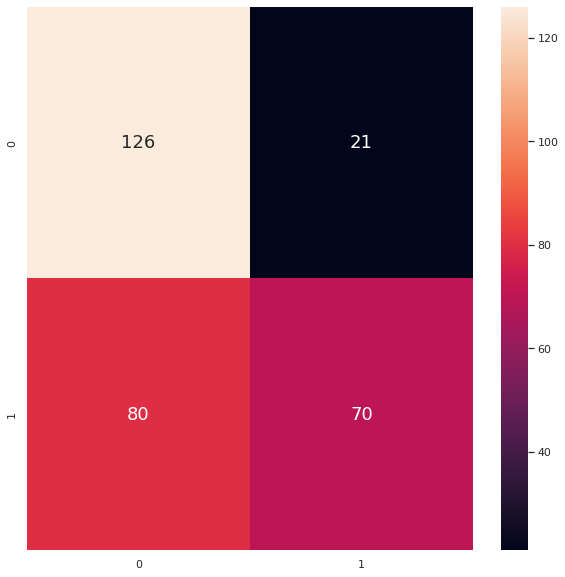

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Decision Tree with max depth = 2
tree_att_re_d2_up = DecisionTreeClassifier(max_depth = 2)

# Decision Tree with max depth = 4
tree_att_re_d4_up = DecisionTreeClassifier(max_depth = 4)


# Fit the tree with max depth 2
tree_att_re_d2_up.fit(X_train, y_train)




# Predict the Response corresponding to Predictors
y_train_pred = tree_att_re_d2_up.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



[Text(0.5, 0.8333333333333334, 'MONTHLYINCOME <= 2874.5\ngini = 0.5\nsamples = 297\nvalue = [147, 150]\nclass = 1'),
 Text(0.25, 0.5, 'OVERTIME_ONE_HOT_Y_1 <= 0.5\ngini = 0.428\nsamples = 103\nvalue = [32, 71]\nclass = 1'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 52\nvalue = [26, 26]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'gini = 0.208\nsamples = 51\nvalue = [6, 45]\nclass = 1'),
 Text(0.75, 0.5, 'ENVIRONMENTSATISFACTION <= 1.5\ngini = 0.483\nsamples = 194\nvalue = [115, 79]\nclass = 0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 40\nvalue = [15, 25]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.455\nsamples = 154\nvalue = [100, 54]\nclass = 0')]

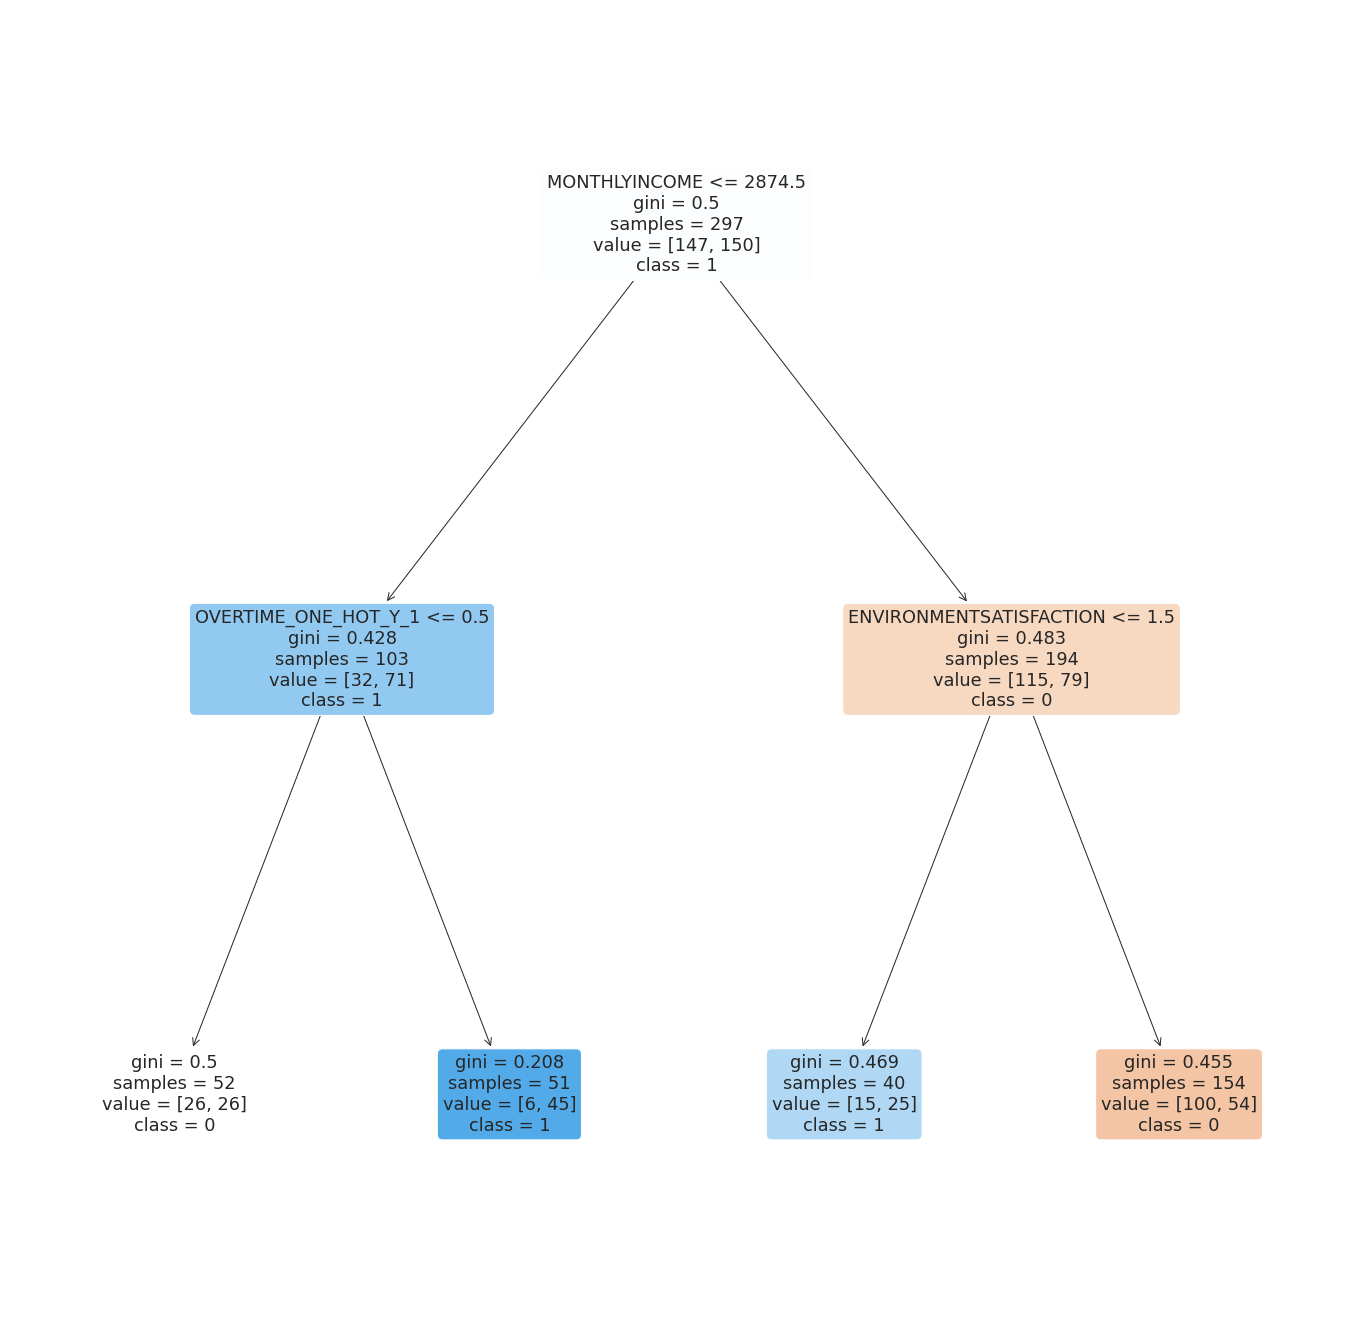

In [66]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(tree_att_re_d2_up, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

In [67]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", tree_att_re_d2_up.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.6599326599326599

TPR Train :	 0.4666666666666667
TNR Train :	 0.8571428571428571

FPR Train :	 0.14285714285714285
FNR Train :	 0.5333333333333333


#### Training Decision Tree with Depth = 4

<AxesSubplot:>

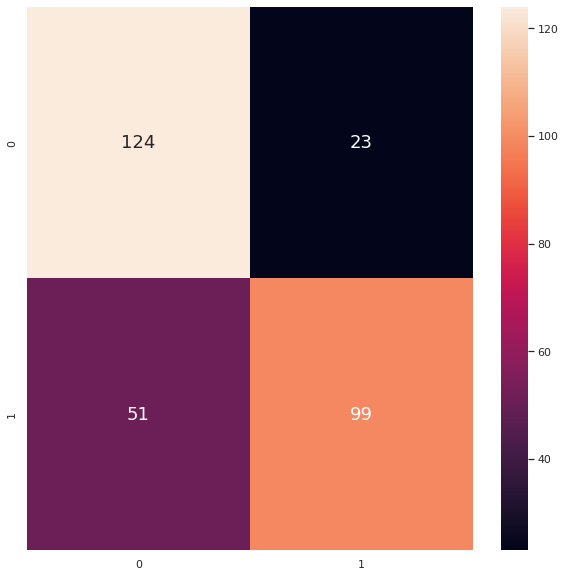

In [68]:
#Training tree with depth = 4
tree_att_re_d4_up.fit(X_train, y_train)


# Predict the Response corresponding to Predictors
y_train_pred = tree_att_re_d4_up.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [69]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", tree_att_re_d4_up.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.7508417508417509

TPR Train :	 0.66
TNR Train :	 0.8435374149659864

FPR Train :	 0.1564625850340136
FNR Train :	 0.34


[Text(0.5, 0.9, 'MONTHLYINCOME <= 2874.5\ngini = 0.5\nsamples = 297\nvalue = [147, 150]\nclass = 1'),
 Text(0.25, 0.7, 'OVERTIME_ONE_HOT_Y_1 <= 0.5\ngini = 0.428\nsamples = 103\nvalue = [32, 71]\nclass = 1'),
 Text(0.125, 0.5, 'MONTHLYINCOME <= 2062.0\ngini = 0.5\nsamples = 52\nvalue = [26, 26]\nclass = 0'),
 Text(0.0625, 0.3, 'DEPARTMENT_[LABELLED] <= 1.5\ngini = 0.32\nsamples = 15\nvalue = [3, 12]\nclass = 1'),
 Text(0.03125, 0.1, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = 1'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.1875, 0.3, 'MONTHLYINCOME <= 2523.0\ngini = 0.47\nsamples = 37\nvalue = [23, 14]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.308\nsamples = 21\nvalue = [17, 4]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = 1'),
 Text(0.375, 0.5, 'JOBSATISFACTION <= 3.5\ngini = 0.208\nsamples = 51\nvalue = [6, 45]\nclass = 1'),
 Text(0.3125, 0.3, 'YEARSSINCELASTPROMOTION <= 5.0\ngini = 0.059\nsam

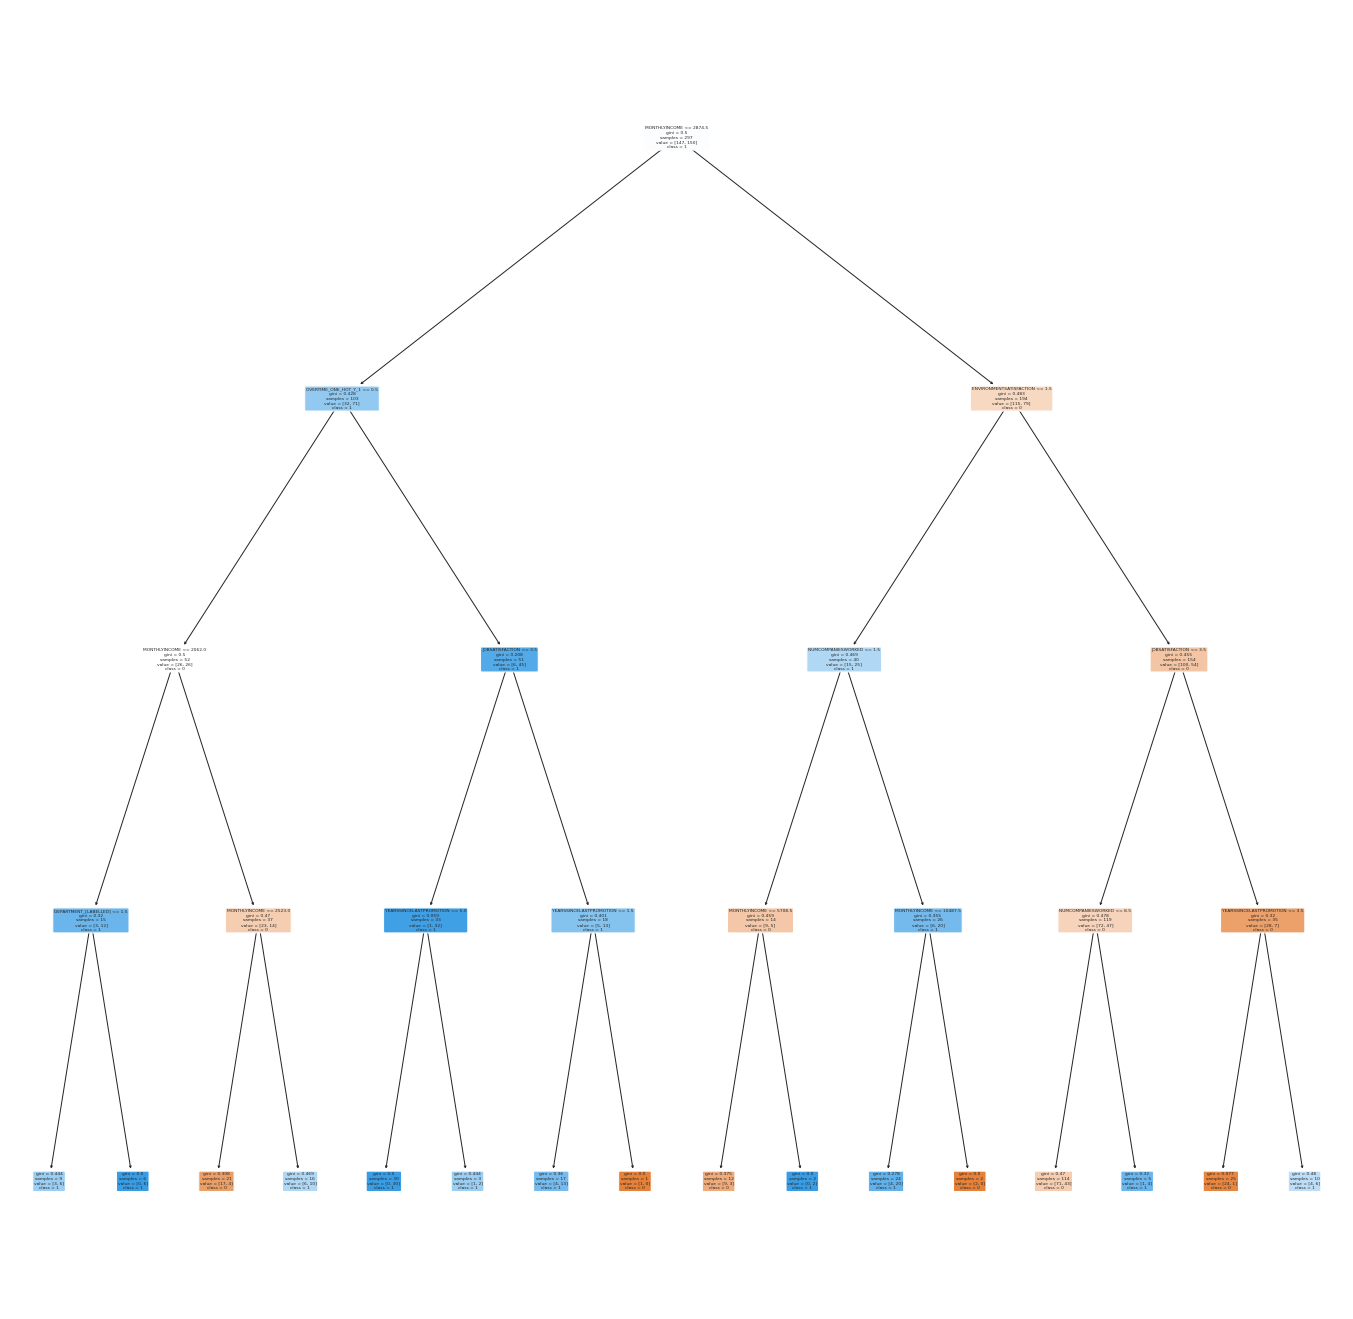

In [70]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(tree_att_re_d4_up, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

#### Predicting Response with Predictors of test data with depth = 2

<AxesSubplot:>

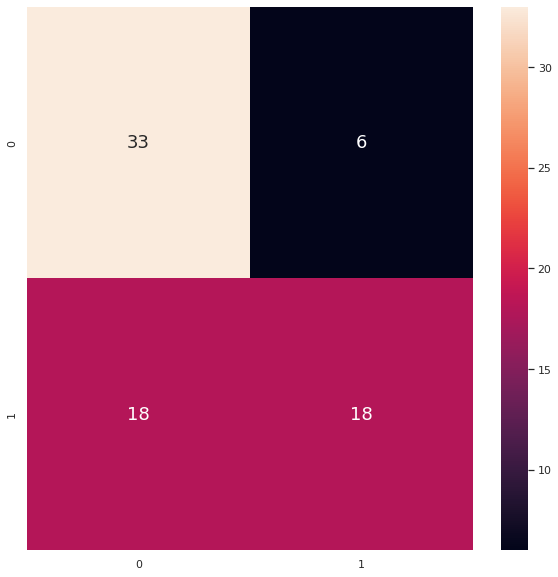

In [71]:


# Predict the Response corresponding to Predictors
y_test_pred = tree_att_re_d2_up.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [72]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_att_re_d2_up.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.68

TPR Test :	 0.5
TNR Test :	 0.8461538461538461

FPR Test :	 0.15384615384615385
FNR Test :	 0.5


#### Predicting Response with Predictors of test data with depth = 4

<AxesSubplot:>

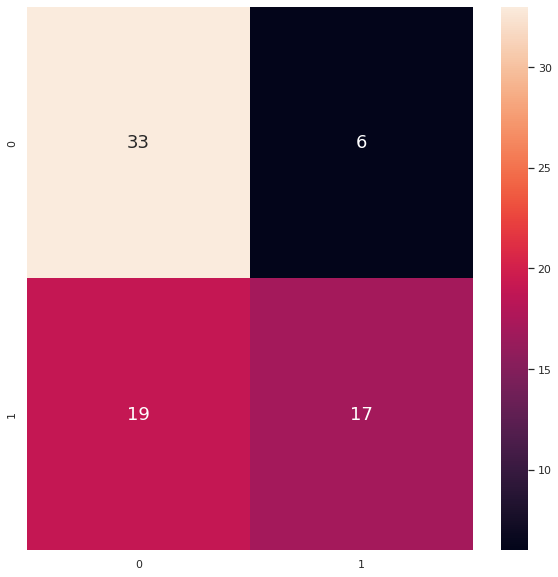

In [73]:
# Predict the Response corresponding to Predictors
y_test_pred = tree_att_re_d4_up.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [74]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_att_re_d4_up.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.6666666666666666

TPR Test :	 0.4722222222222222
TNR Test :	 0.8461538461538461

FPR Test :	 0.15384615384615385
FNR Test :	 0.5277777777777778


Looking at the decision trees, the decision tree models did slightly worse after resampling of the data. Even still, we got rid of the inflence of class imbalance on the classification accuracy metrics, making the decision tree more reliable.

Though the decision tree was not able to classify the data very accurately, we looked through the decision tree and found some nodes where there is a clear indication of a trend. 

A few ideas we gathered from the plotting of the decision tree:

Considering instances where the leaf nodes had a gini coefficient of 0 (where all the data points in the node is either ATTRITION_ONE_HOT_Y_1 == 1 or 0) :

(1)
OVERTIME_ONE_HOT_Y_1 < 0.5
MONTHLY INCOME > 2064
ENVIRONMENT SATISFACTION > 1.5
MONTHLYINCOME < 2459.8
Class = 0  (18)

(2)
OVERTIME_ONE_HOT_Y_1 > 0.5
MONTHLY INCOME < 2563
NUMCOMPANIESWORKED < 5.5
ENVIRONMENTSATISFACTION < 3.5
Class = 0 (25)

(3)
OVERTIME_ONE_HOT_Y_1 < 0.5
MONTHLY INCOME > 2064
ENVIRONMENT SATISFACTION < 1.5
JOBSATISFACTION < 1.5

Class = 1 (6)

(4)
OVERTIME_ONE_HOT_Y_1 < 0.5
MONTHLY INCOOME < 2064
ENVIRONMENT SATISFACTION < 2.5
JOBINVOLVEMENT < 2.5

Class = 1 (4)



Note: The number in the bracket at 'Class' refers to the number of data points that are in the node. The higher the number, the better the indication of classification for that node.

## 6.3 Multilayer Perceptron Neural Network

In [75]:
# Import the Multilayered Perceptron Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split # Random Splitter


## Instantiate an mlp object
mlp = MLPClassifier(max_iter=500, activation = 'relu', random_state=0)

In [76]:
from sklearn.model_selection import train_test_split # Random Splitter
Y = pd.DataFrame(attrition_df['ATTRITION_ONE_HOT_Y_1']).values.ravel()
xTrain, xTest, yTrain, yTest = train_test_split(numeric_data,Y, test_size = 0.2, random_state = 7)

In [77]:
# Training the mlp Neural Network with Training Dataset
mlp.fit(xTrain, yTrain)

# Assign Expected and Actual Values
expected_y  = yTest
predicted_y = mlp.predict(xTest)

In [78]:
mlp.predict_proba(xTest)

array([[1.00000000e+00, 1.19437093e-10],
       [1.00000000e+00, 8.67185607e-12],
       [1.00000000e+00, 3.64531641e-16],
       [1.95565156e-05, 9.99980443e-01],
       [9.26912875e-07, 9.99999073e-01],
       [8.73122620e-01, 1.26877380e-01],
       [9.99999984e-01, 1.57521762e-08],
       [6.62647368e-08, 9.99999934e-01],
       [1.00000000e+00, 9.08470593e-24],
       [3.45532977e-06, 9.99996545e-01],
       [1.00000000e+00, 8.42897374e-15],
       [9.99993960e-01, 6.03966460e-06],
       [9.99999593e-01, 4.07272148e-07],
       [1.00000000e+00, 4.11058338e-16],
       [1.00000000e+00, 6.50475821e-32],
       [1.00000000e+00, 7.52021168e-14],
       [9.99998008e-01, 1.99193393e-06],
       [9.61975590e-01, 3.80244099e-02],
       [1.00000000e+00, 2.23135283e-16],
       [9.58436133e-01, 4.15638671e-02],
       [1.00000000e+00, 2.81621426e-38],
       [9.25119587e-01, 7.48804128e-02],
       [9.99237877e-01, 7.62123264e-04],
       [8.86352001e-01, 1.13647999e-01],
       [1.000000

In [79]:
mlp.predict(xTest)

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.])

In [80]:
mlp.score(xTest, yTest)

0.7799043062200957

In [81]:
# Scores: Classification Report
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       183
         1.0       0.24      0.35      0.28        26

    accuracy                           0.78       209
   macro avg       0.57      0.59      0.58       209
weighted avg       0.82      0.78      0.80       209



In [82]:
# Confusion Matrix based on Prediction and Actual

conM = metrics.confusion_matrix(expected_y, predicted_y)
conM

array([[154,  29],
       [ 17,   9]])

This is the Heat Map of the Confusion Matrix that is derived from the MLPClassifier: 


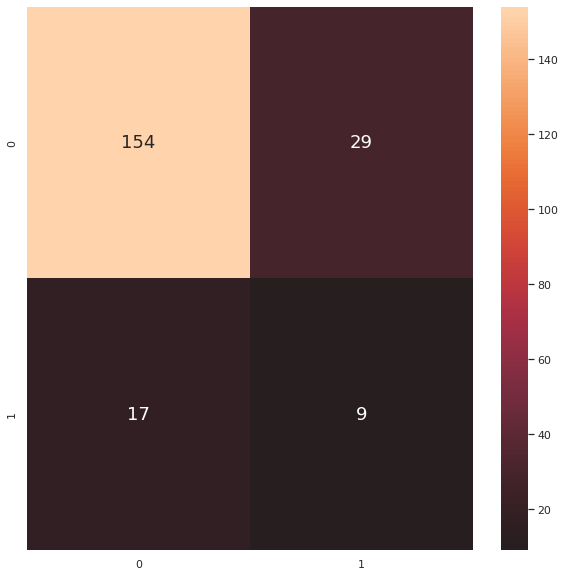

In [83]:
# Plotting the HeatMap from the Confusion Matrix
sb.heatmap(conM, annot = True, fmt=".0f", annot_kws={"size": 18}, center=True)
print("This is the Heat Map of the Confusion Matrix that is derived from the MLPClassifier: ")
plt.show()

# 7. Conclusion

#### To conclude, using Logistics Regression and Decision Trees, we managed to identified a few important factors that contributed to Employee Attrition.

When these factors are used to predict Employee Attrition, the MLP model is largely accurate in predicting when employees choose not to quit.  

Unfortunately, we cannot identify all the possible significant factors that causes attrition.  

However, employers are able to make use of these insights to lower the chances of attrition by building workspaces that maximises these factors.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b7df77b2-5196-454a-a806-ccae31397319' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>